# Heart Disease Dataset 
(Dataset disponível em > [Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download) <)

A principal ideia desse Dataset é de alguma maneira conseguir preditar um indíviduo possivelmente com alguma doença cardíaca a partir de 

fatores pessoiais. 


Esse Dataset reúne dados de 1988 de 4 lugares diferentes, sendo eles: Cleveland, Hungary, Switzerland e Long Beach V. As colunas são compostas por essas 14 variáveis:



1. **age**  
   Idade do paciente em anos.

2. **sex**  
   Sexo do paciente:  
   - 1 = Masculino  
   - 0 = Feminino

3. **chest pain type (4 values)**  
   Tipo de dor no peito apresentada pelo paciente:  
   - 0 = Angina típica  
   - 1 = Angina atípica  
   - 2 = Dor não anginosa  
   - 3 = Assintomático

4. **resting blood pressure**  
   Pressão arterial em repouso (em mm Hg) medida na admissão do hospital.

5. **serum cholestoral in mg/dl**  
   Nível de colesterol sérico (em mg/dl).

6. **fasting blood sugar > 120 mg/dl**  
   Açúcar no sangue em jejum maior que 120 mg/dl:  
   - 1 = Verdadeiro  
   - 0 = Falso

7. **resting electrocardiographic results (values 0, 1, 2)**  
   Resultados do exame eletrocardiográfico em repouso:  
   - 0 = Normal  
   - 1 = Anormalidade na onda ST-T  
   - 2 = Hipertrofia ventricular esquerda provável ou definitiva

8. **maximum heart rate achieved**  
   Frequência cardíaca máxima atingida durante o exercício.

9. **exercise induced angina**  
   Angina induzida por exercício:  
   - 1 = Sim  
   - 0 = Não

10. **oldpeak**  
    Depressão do segmento ST induzida pelo exercício em relação ao repouso (medida em mm).  
    Indica alterações no ECG associadas à isquemia.

11. **the slope of the peak exercise ST segment**  
    Inclinação do segmento ST durante o exercício máximo:  
    - 0 = Ascendente  
    - 1 = Plano  
    - 2 = Descendente

12. **number of major vessels (0–3) colored by flourosopy**  
    Número de vasos principais (de 0 a 3) coloridos pela fluoroscopia.

13. **thal**  
    Resultado do exame de talassemia:  
    - 0 = Normal  
    - 1 = Defeito fixo  
    - 2 = Defeito reversível

14. **target**
   Possui ou não possui doença cardíaca
   - 0 = Indivíduo não possúi doença cardíaca
   - 1 = Indivíduo possúi doença cardíaca

## Análise exploratória

Para começar a análise exploratória vamos primeiramente fazer algumas importações necessárias.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [25]:
heart_ds = pd.read_csv("heart.csv")
heart_ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
len(heart_ds)

1025

Temos inicialmente 1025 pacientes para analisar, porém ao analisarmos mais a fundo vemos que vários desses dados são dados duplicados, ou seja, são apenas linhas repetidas, e elaborar modelos com Datasets com dados repetidos é péssimo, já que dessa maneira estamos enviesando a distribuição dos dados.

In [4]:
heart_ds.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [26]:
heart_ds = heart_ds.drop_duplicates()
len(heart_ds)

302

O tamanho do nosso Dataset decresceu muito, porém agora temos mais fidelidade nos dados coletados.

In [27]:

heart_ds = heart_ds.reset_index(drop=True) # Tirando também dados incompletos caso existam
heart_ds



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
298,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
299,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
300,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


Aqui, veremos as distribuicões das variáveis, onde podemos fazer a identificaçao de outlier e termos uma visao do equilibrio das distribuiçoes dos dados.

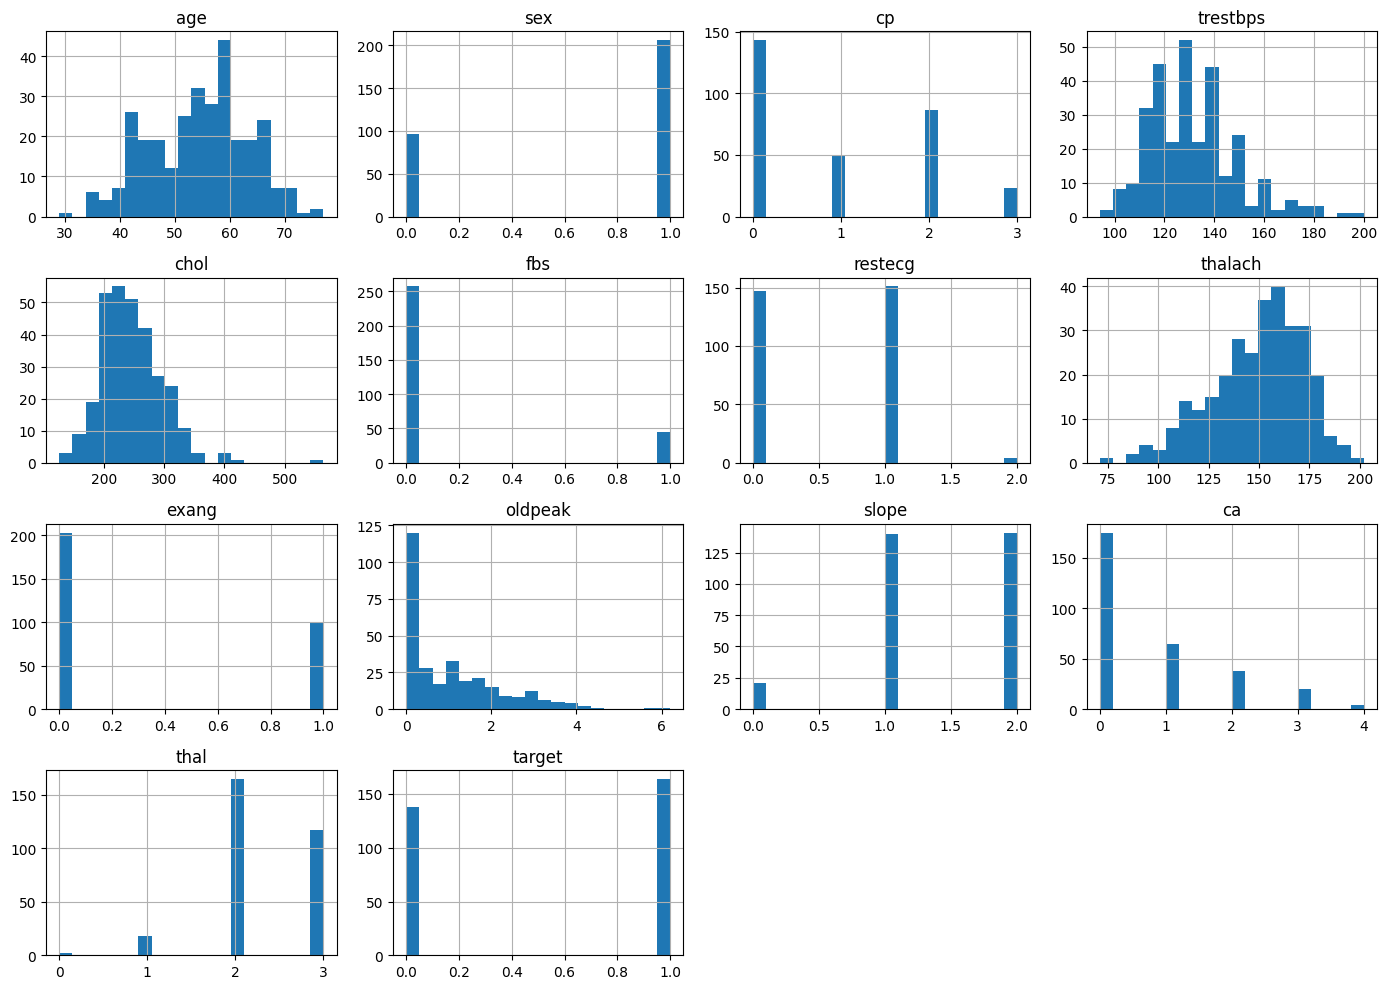

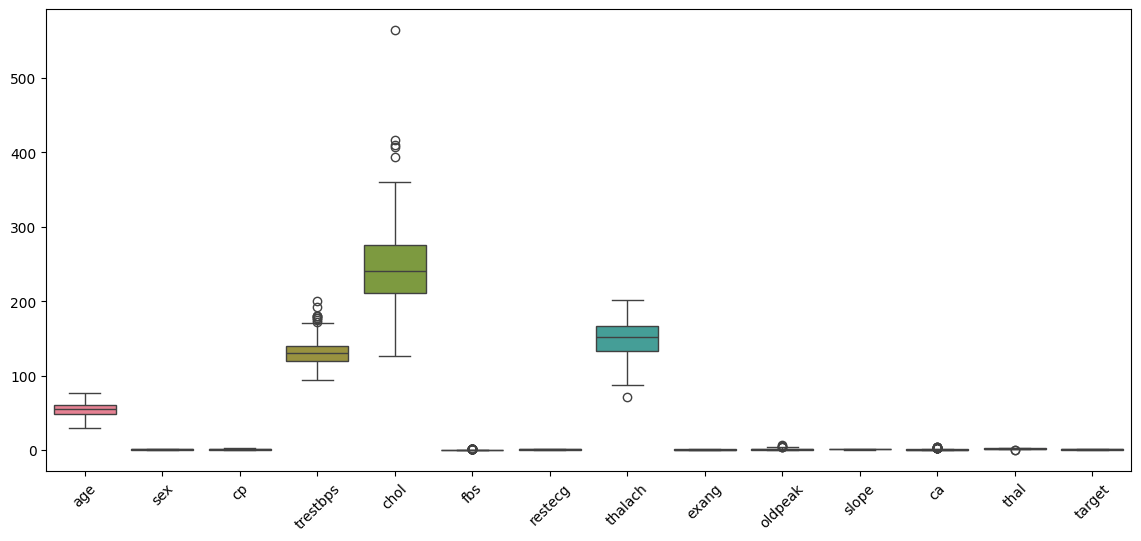

In [7]:
df = heart_ds

df.hist(figsize=(14, 10), bins=20)
plt.tight_layout()
plt.show()

# Boxplots para verificar outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=45)
plt.show()


Temos um grande outlier nos dados de colesterol, porém pode ser explicado por alguma doença presente no indivíduo que traz essa característica. Outra importante análise é a do balancemanto entre indíviduos classificados com target = 0  e target = 1.

É muito importante para realizar modelos preditivos treinar com um Dataset bem balanceado, uma vez que, caso contrário, seria benéfico ao modelo "chutar" mais de algum tipo dependendo do balanceamento. Por exemplo, se um dataset tiver 90% dos dados classificados como `não possui doença cardíaca` e o modelo classificar apenas como `não possui doença cardíaca` a acuracia do do modelo será de 90%, dando a falsa impressão de que o modelo é bom. Porém o modelo estará cometendo um dos mais graves erros na área medica: classificar um paciente doente como um paciente normal. Logo, é de suma importancia olhar para as distribuiçoes das classes para podermos tomar decisoes de forma a atenuar esse problema. 

Podemos ver que o Dataset usado apresenta desequilibrio de de algumas variáveis que pretendemos utilizar como variáveis preditoras. Uma estratégia válida para lidar com esse desequilibrio seria utilizar modelos grandes para geraçao de dados sinteticos de forma a equilibrar as variáveis preditivas. Isso costuma fortalecer a capacidade de generalizaçao do modelo.

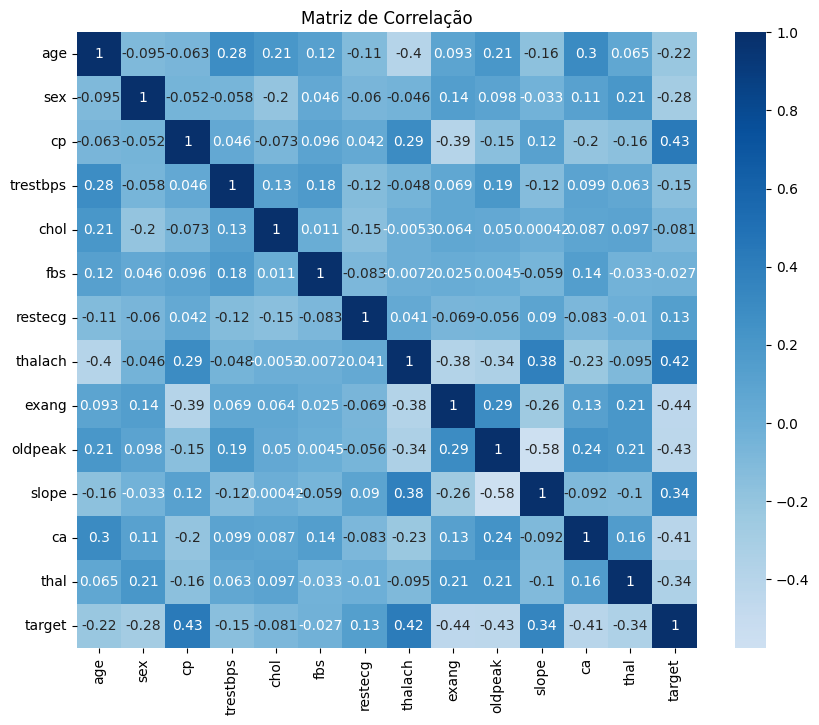

In [8]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="Blues", center=0)
plt.title("Matriz de Correlação")
plt.show()


Usar duas variáveis com alta correlaçao como preditoras pode causar instabilidade numerica na matriz de covarivancia e ocasionar maleficios para os preditores. Logo, se duas variáveis tem correlaçao acima de 0.4 em módulo, vamos escolher apenas uma delas para para serem preditora do modelo.

1. `age x thalach` : -0.4
2. `slope x thalach`: 0.38
3. `thalach x oldpeak`: 0.34
4. `exang x oldpeak`: 0.29
5. `cp x exang`: -0.39
6. `thalach x cp`: 0.29

## Modelos de classificação para target

Trata-se de uma classificação binária, então podemos fazer diversos modelos, aqui trataremos desses:
- regrassao linear
- LDA
- QDA
- Regressão Logística
- KNN
- SVM
- Rede Neural

Por fim faremos a comparação fiel entre os modelos e qual seria mais adequado para essa devida tarefa.

### Regressão Linear (Classificação)

In [28]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

A ideia da utilizaçao de regrassão linear para classificaçao é tentar prever a variável alvo como uma variável categórica alvo como uma variavel continua e usar um limiar a partir do qual classificaremos o alvo como categorico. Se temos duas classes para prever, uma aproximação

OLS (apenas diagnóstico) — R² e summary:
R² (train): 0.529
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     11.98
Date:                Sat, 01 Nov 2025   Prob (F-statistic):           6.92e-23
Time:                        12:45:04   Log-Likelihood:                -72.849
No. Observations:                 211   AIC:                             183.7
Df Residuals:                     192   BIC:                             247.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

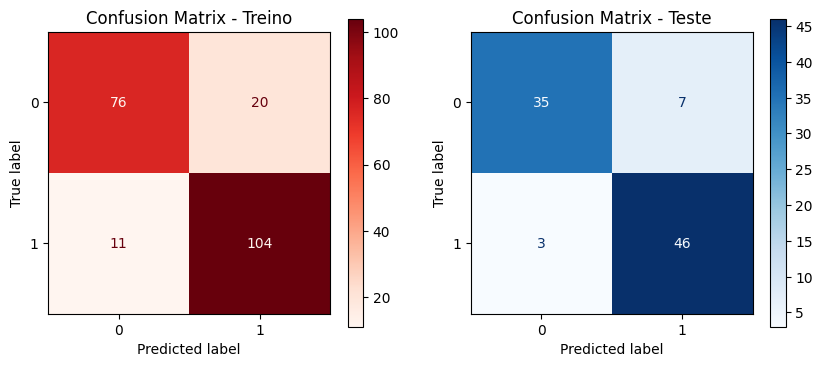

Acurácia no conjunto de treino: 0.853
Acurácia no conjunto de teste: 0.890 


Agora retiramos preditores com p-valor > 0.05 por meio de backward selection
Removendo 'thal_2' com p-valor 0.983
Removendo 'restecg_2' com p-valor 0.889
Removendo 'slope_2' com p-valor 0.828
Removendo 'fbs' com p-valor 0.625
Removendo 'thal_1' com p-valor 0.445
Removendo 'chol' com p-valor 0.376
Removendo 'restecg_1' com p-valor 0.195
Removendo 'exang' com p-valor 0.104
Removendo 'trestbps' com p-valor 0.067
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     22.90
Date:                Sat, 01 Nov 2025   Prob (F-statistic):           1.41e-26
Time:                        12:45:05   Log-Likelihood:                -77.823
No. Observations:                 2

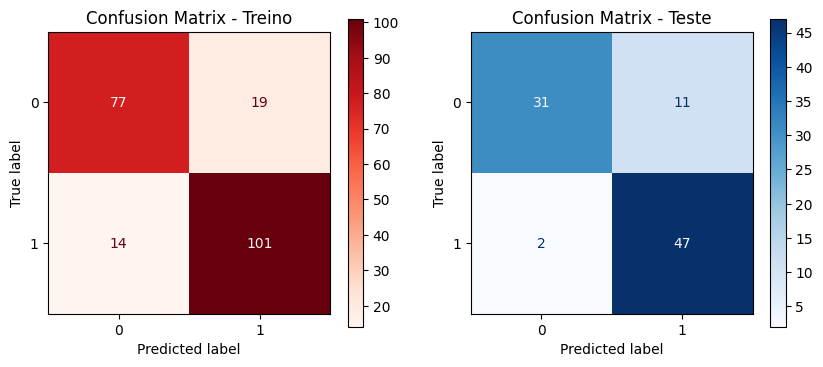

Acurácia no conjunto de treino: 0.844
Acurácia no conjunto de teste: 0.857 


Acurácia no conjunto de teste: 0.857 




In [29]:
X = heart_ds.drop(["target", "age"], axis=1)
y = heart_ds["target"]

categorical_cols = ['cp', 'thal', 'slope', 'restecg']
categorical_cols = [c for c in categorical_cols if c in X.columns]
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

scalizer = StandardScaler() # normaliza os dados e reduz a variancia dos coeficientes
X = pd.DataFrame(scalizer.fit_transform(X), columns=X.columns)

X_const = sm.add_constant(X) # aciciona constante para o intercepto

X_train, X_test, y_train, y_test = train_test_split(X_const, y, test_size=0.3, random_state=200, stratify=y)

X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)
model_ols = sm.OLS(y_train, X_train).fit()
print("OLS (apenas diagnóstico) — R² e summary:")
print(f"R² (train): {model_ols.rsquared:.3f}")
print(model_ols.summary())
print("\nmatriz de covariância dos coeficientes:")
print(model_ols.cov_params())

y_pred_train = model_ols.predict(X_train)
y_pred_test  = model_ols.predict(X_test)

y_pred_train = np.where(y_pred_train > 0.5, 1, 0)
y_pred_test  = np.where(y_pred_test  > 0.5, 1, 0)

for i in range(len(y_pred_train)):
    if y_pred_train[i] <= 0.5:
        y_pred_train[i] = 0
    else:
        y_pred_train[i] = 1


fig, axes = plt.subplots(1, 2, figsize=(10, 4))

cm = confusion_matrix(y_train, y_pred_train)
cm_display_train = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display_train.plot(cmap=plt.cm.Reds, ax=axes[0])
axes[0].set_title("Confusion Matrix - Treino")

for i in range(len(y_pred_test)):
    if y_pred_test[i] <= 0.5:
        y_pred_test[i] = 0
    else:
        y_pred_test[i] = 1

cm = confusion_matrix(y_test, y_pred_test)
cm_display_test = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display_test.plot(cmap=plt.cm.Blues, ax=axes[1])
axes[1].set_title("Confusion Matrix - Teste")
plt.show()

acc = accuracy_score(y_train, y_pred_train)
print(f"Acurácia no conjunto de treino: {acc:.3f}")
acc = accuracy_score(y_test, y_pred_test)
print(f"Acurácia no conjunto de teste: {acc:.3f} \n\n")

print(f'Agora retiramos preditores com p-valor > 0.05 por meio de backward selection')

X_opt = X_train.copy()
X_opt_test = X_test.copy()
threshold = 0.05

while True:
    model = sm.OLS(y_train, X_opt).fit()
    pvals = model.pvalues.drop("const", errors="ignore")
    worst_pval = pvals.max()
    if worst_pval > threshold:
        worst_var = pvals.idxmax()
        print(f"Removendo '{worst_var}' com p-valor {worst_pval:.3f}")
        X_opt = X_opt.drop(columns=[worst_var])
        X_opt_test = X_opt_test.drop(columns=[worst_var])
    else:
        break

model_final = sm.OLS(y_train, X_opt).fit()

print(model_final.summary())
print("\nmatriz de covariância dos coeficientes:")
print(model_final.cov_params())

y_pred_train = model_final.predict(X_opt)
y_pred_test  = model_final.predict(X_opt_test)

y_pred_train = np.where(y_pred_train > 0.5, 1, 0)
y_pred_test  = np.where(y_pred_test  > 0.5, 1, 0)

for i in range(len(y_pred_train)):
    if y_pred_train[i] <= 0.5:
        y_pred_train[i] = 0
    else:
        y_pred_train[i] = 1


fig, axes = plt.subplots(1, 2, figsize=(10, 4))

cm = confusion_matrix(y_train, y_pred_train)
cm_display_train = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display_train.plot(cmap=plt.cm.Reds, ax=axes[0])
axes[0].set_title("Confusion Matrix - Treino")

for i in range(len(y_pred_test)):
    if y_pred_test[i] <= 0.5:
        y_pred_test[i] = 0
    else:
        y_pred_test[i] = 1

cm = confusion_matrix(y_test, y_pred_test)
cm_display_test = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display_test.plot(cmap=plt.cm.Blues, ax=axes[1])
axes[1].set_title("Confusion Matrix - Teste")
plt.show()

acc = accuracy_score(y_train, y_pred_train)
print(f"Acurácia no conjunto de treino: {acc:.3f}")
acc = accuracy_score(y_test, y_pred_test)
print(f"Acurácia no conjunto de teste: {acc:.3f} \n\n")


Podemos ver que após o backward selection, as variâncias dos estimadores em geral diminuiu devido à remoçao de algumas variaveis que apresentavam dependencias lineares entre si. 

Para comparar nosso modelo com outros, é importante obter uma estimativa mais robusta de seu desempenho médio.

Para isso, utilizaremos a validação cruzada (cross-validation), aplicando a regressão linear em cinco divisões (folds) diferentes dos dados.

Esse método fornece uma estimativa mais confiável da performance média do modelo, pois reduz a influência da divisão específica dos dados em treino e teste, além de representar melhor sua capacidade de generalização — ou seja, o risco de erro ao aplicar o modelo em novos dados.

Removendo 'restecg_2' com p-valor 0.983
Removendo 'slope_2' com p-valor 0.700
Removendo 'fbs' com p-valor 0.567
Removendo 'thal_1' com p-valor 0.443
Removendo 'thal_3' com p-valor 0.981
Removendo 'exang' com p-valor 0.437
Removendo 'cp_3' com p-valor 0.295
Removendo 'chol' com p-valor 0.291
Removendo 'slope_1' com p-valor 0.221
Removendo 'cp_1' com p-valor 0.068
Removendo 'trestbps' com p-valor 0.059


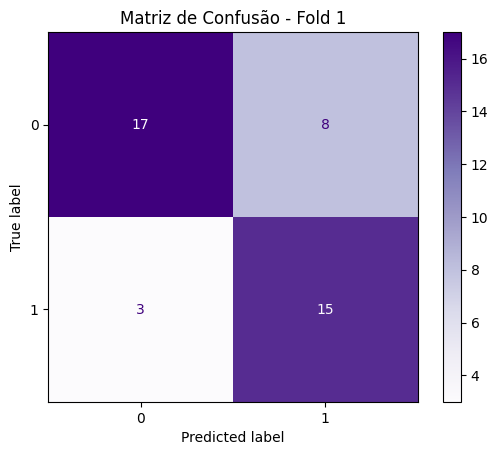

Fold 1 - Acc: 0.744 | Prec: 0.652 | Rec: 0.833 | F1: 0.732
Removendo 'restecg_2' com p-valor 0.833
Removendo 'thal_2' com p-valor 0.824
Removendo 'thal_1' com p-valor 0.870
Removendo 'slope_2' com p-valor 0.813
Removendo 'fbs' com p-valor 0.523
Removendo 'exang' com p-valor 0.246
Removendo 'trestbps' com p-valor 0.207
Removendo 'chol' com p-valor 0.100


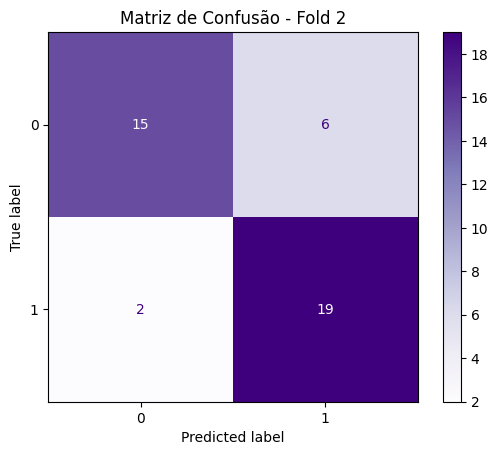

Fold 2 - Acc: 0.810 | Prec: 0.760 | Rec: 0.905 | F1: 0.826
Removendo 'thal_2' com p-valor 0.804
Removendo 'restecg_2' com p-valor 0.600
Removendo 'thal_1' com p-valor 0.503
Removendo 'slope_2' com p-valor 0.471
Removendo 'chol' com p-valor 0.425
Removendo 'cp_3' com p-valor 0.420
Removendo 'trestbps' com p-valor 0.446
Removendo 'cp_2' com p-valor 0.308
Removendo 'cp_1' com p-valor 0.294
Removendo 'restecg_1' com p-valor 0.170
Removendo 'fbs' com p-valor 0.115
Removendo 'slope_1' com p-valor 0.074
Removendo 'thal_2' com p-valor 0.804
Removendo 'restecg_2' com p-valor 0.600
Removendo 'thal_1' com p-valor 0.503
Removendo 'slope_2' com p-valor 0.471
Removendo 'chol' com p-valor 0.425
Removendo 'cp_3' com p-valor 0.420
Removendo 'trestbps' com p-valor 0.446
Removendo 'cp_2' com p-valor 0.308
Removendo 'cp_1' com p-valor 0.294
Removendo 'restecg_1' com p-valor 0.170
Removendo 'fbs' com p-valor 0.115
Removendo 'slope_1' com p-valor 0.074


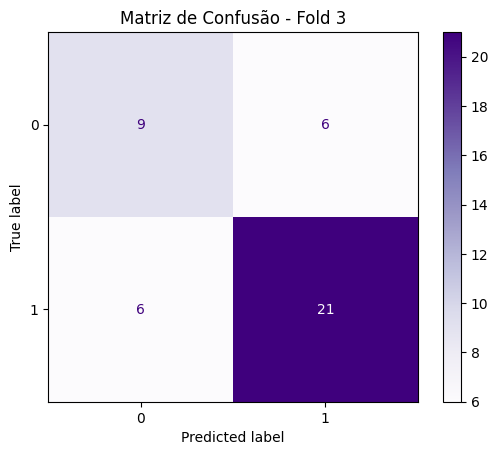

Fold 3 - Acc: 0.714 | Prec: 0.778 | Rec: 0.778 | F1: 0.778
Removendo 'thal_1' com p-valor 0.942
Removendo 'restecg_2' com p-valor 0.862
Removendo 'slope_2' com p-valor 0.709
Removendo 'thal_3' com p-valor 0.685
Removendo 'fbs' com p-valor 0.678
Removendo 'chol' com p-valor 0.560
Removendo 'trestbps' com p-valor 0.423
Removendo 'restecg_1' com p-valor 0.217
Removendo 'restecg_1' com p-valor 0.217
Removendo 'thalach' com p-valor 0.161
Removendo 'thal_2' com p-valor 0.103
Removendo 'cp_1' com p-valor 0.063
Removendo 'thalach' com p-valor 0.161
Removendo 'thal_2' com p-valor 0.103
Removendo 'cp_1' com p-valor 0.063


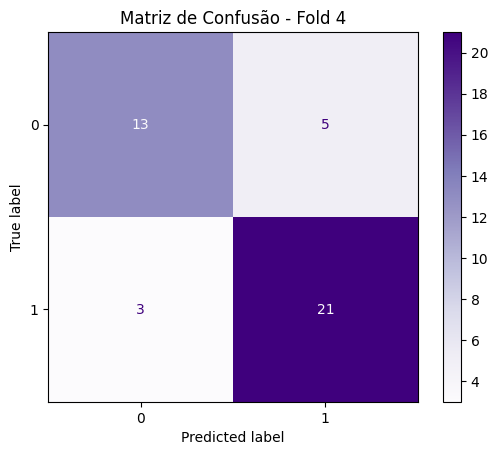

Fold 4 - Acc: 0.810 | Prec: 0.808 | Rec: 0.875 | F1: 0.840
Removendo 'thal_3' com p-valor 0.979
Removendo 'restecg_2' com p-valor 0.974
Removendo 'slope_2' com p-valor 0.893
Removendo 'thal_1' com p-valor 0.896
Removendo 'fbs' com p-valor 0.850
Removendo 'restecg_1' com p-valor 0.806
Removendo 'chol' com p-valor 0.696
Removendo 'thalach' com p-valor 0.422
Removendo 'thal_2' com p-valor 0.324
Removendo 'trestbps' com p-valor 0.145
Removendo 'exang' com p-valor 0.070
Removendo 'fbs' com p-valor 0.850
Removendo 'restecg_1' com p-valor 0.806
Removendo 'chol' com p-valor 0.696
Removendo 'thalach' com p-valor 0.422
Removendo 'thal_2' com p-valor 0.324
Removendo 'trestbps' com p-valor 0.145
Removendo 'exang' com p-valor 0.070


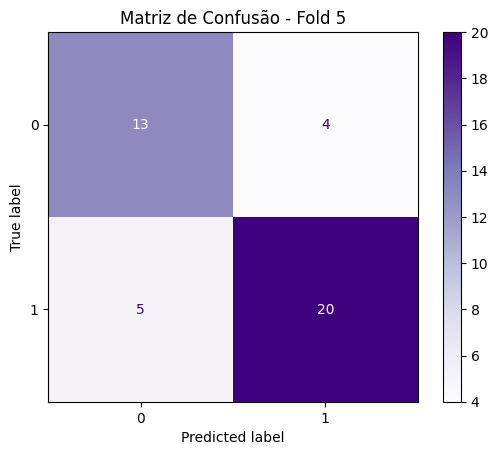

Fold 5 - Acc: 0.786 | Prec: 0.833 | Rec: 0.800 | F1: 0.816

Acurácias por fold: [0.7441860465116279, 0.8095238095238095, 0.7142857142857143, 0.8095238095238095, 0.7857142857142857]
Acurácia média: 0.773 ± 0.038
Precisões por fold: [0.6521739130434783, 0.76, 0.7777777777777778, 0.8076923076923077, 0.8333333333333334]
Precisão média: 0.766 ± 0.062
Recalls por fold: [0.8333333333333334, 0.9047619047619048, 0.7777777777777778, 0.875, 0.8]
Recall médio: 0.838 ± 0.047
F1 por fold: [0.7317073170731707, 0.8260869565217391, 0.7777777777777778, 0.84, 0.8163265306122449]
F1 médio: 0.798 ± 0.039
Usando os dados de y_test como dados de validação final:
Acurácia (final): 0.857
Precisão (final): 0.810
Recall (final): 0.959
F1 (final): 0.879
Acurácia (final): 0.857
Precisão (final): 0.810
Recall (final): 0.959
F1 (final): 0.879


In [30]:
kf = KFold(n_splits=5, shuffle=True, random_state=360)

# listas para métricas por fold
accuracies = []
precisions = []
recalls = []
f1s = []
fold = 1

# garantir índices e tipos alinhados
y_opt = y_train.reset_index(drop=True).astype(float)
X_opt = X_train.reset_index(drop=True).astype(float)

for train_index, test_index in kf.split(X_opt):
    X_train_cv = X_opt.iloc[train_index].reset_index(drop=True)
    X_test_cv  = X_opt.iloc[test_index].reset_index(drop=True)
    y_train_cv = y_opt.iloc[train_index].reset_index(drop=True)
    y_test_cv  = y_opt.iloc[test_index].reset_index(drop=True)

    # adiciona constante apenas se necessário (não duplica se já existir)
    X_train_const = sm.add_constant(X_train_cv)
    X_test_const  = sm.add_constant(X_test_cv)

    # backward selection dentro do fold
    threshold = 0.05
    selected_X_train = X_train_const.copy()
    selected_X_test = X_test_const.copy()

    while True:
        model_cv = sm.OLS(y_train_cv, selected_X_train).fit()
        pvals = model_cv.pvalues.drop("const", errors="ignore")
        if pvals.empty:
            break
        worst_var = pvals.idxmax()
        worst_pval = pvals.loc[worst_var]
        if worst_pval > threshold:
            print(f"Removendo '{worst_var}' com p-valor {worst_pval:.3f}")
            selected_X_train = selected_X_train.drop(columns=[worst_var])
            selected_X_test = selected_X_test.drop(columns=[worst_var])
        else:
            break

    # ajusta o modelo do fold com os preditores selecionados
    model_fold = sm.OLS(y_train_cv, selected_X_train).fit()

    # previsões e binarização por limiar 0.5
    y_pred = model_fold.predict(selected_X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # métricas
    acc = accuracy_score(y_test_cv, y_pred_binary)
    prec = precision_score(y_test_cv, y_pred_binary, zero_division=0)
    rec = recall_score(y_test_cv, y_pred_binary, zero_division=0)
    f1 = f1_score(y_test_cv, y_pred_binary, zero_division=0)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)

    # matriz de confusão do fold
    cm = confusion_matrix(y_test_cv, y_pred_binary)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Purples)
    plt.title(f"Matriz de Confusão - Fold {fold}")
    plt.show()

    print(f"Fold {fold} - Acc: {acc:.3f} | Prec: {prec:.3f} | Rec: {rec:.3f} | F1: {f1:.3f}")
    fold += 1

# resumo por métrica (média ± std)
print()
print(f"Acurácias por fold: {accuracies}")
print(f"Acurácia média: {np.mean(accuracies):.3f} ± {np.std(accuracies):.3f}")
print(f"Precisões por fold: {precisions}")
print(f"Precisão média: {np.mean(precisions):.3f} ± {np.std(precisions):.3f}")
print(f"Recalls por fold: {recalls}")
print(f"Recall médio: {np.mean(recalls):.3f} ± {np.std(recalls):.3f}")
print(f"F1 por fold: {f1s}")
print(f"F1 médio: {np.mean(f1s):.3f} ± {np.std(f1s):.3f}")

# Avaliação final no conjunto de teste reservado (modelo final obtido pelo backward selection global)
print('Usando os dados de y_test como dados de validação final:')
y_pred = model_final.predict(X_opt_test)
y_pred_binary = (y_pred > 0.5).astype(int)
acc_final = accuracy_score(y_test, y_pred_binary)
prec_final = precision_score(y_test, y_pred_binary, zero_division=0)
rec_final = recall_score(y_test, y_pred_binary, zero_division=0)
f1_final = f1_score(y_test, y_pred_binary, zero_division=0)
print(f"Acurácia (final): {acc_final:.3f}")
print(f"Precisão (final): {prec_final:.3f}")
print(f"Recall (final): {rec_final:.3f}")
print(f"F1 (final): {f1_final:.3f}")

Resultados da validação cruzada (5‑fold) com Backward Elimination dentro de cada fold (OLS + limiar 0.5):

- Acurácia média: 0.773 ± 0.038
- Precisão média: 0.766 ± 0.062
- Recall médio: 0.838 ± 0.047
- F1 médio: 0.798 ± 0.039

Desempenho no conjunto de teste reservado (modelo final do backward global):
- Acurácia: 0.857
- Precisão: 0.810
- Recall: 0.959
- F1: 0.879

Observações:
- A seleção dentro de cada fold reduz o viés de validação; como esperado, as médias de CV ficaram um pouco menores do que quando a seleção era feita fora da validação.
- O recall no teste segue alto (0.959), alinhado ao objetivo de reduzir falsos negativos; há um trade‑off moderado na precisão (0.810).
- As estatísticas acima são médias ± desvio‑padrão entre os folds e indicam variabilidade modesta.

### LDA

Após a abordagem inicial com a Regressão Linear como um classificador, passaremos agora para a Análise Linear Discriminante (LDA), um método que modela a classificação de maneira inerentemente estatística e mais robusta.

LDA é um algoritmo que assume que os dados de cada classe seguem uma distribuição Gaussiana (Normal) e que todas as classes compartilham da mesma matriz de covariância (ou seja, a mesma dispersão). A ideia central é:

Projetar os Dados: Encontrar um eixo (ou subespaço) que maximize a separação entre as médias das classes e minimize a variação dentro de cada classe.

Decisão: Classificar um novo ponto de dados na classe cuja média ele está mais próximo, após a projeção.

A principal vantagem do LDA é a sua capacidade de reduzir a dimensionalidade enquanto otimiza a separação entre as classes, tornando-o um classificador linear eficiente e interpretável. Para garantir a validade estatística do modelo, o Standard Scaling das variáveis contínuas é um passo obrigatório, pois o LDA é sensível à escala das variáveis

AVALIAÇÃO DO LDA NO CONJUNTO DE TESTE (30%)
-------------------------------------------
Acurácia : 0.854
Precisão : 0.851
Sensibilidade: 0.867
--------------------------------------------


<Figure size 600x600 with 0 Axes>

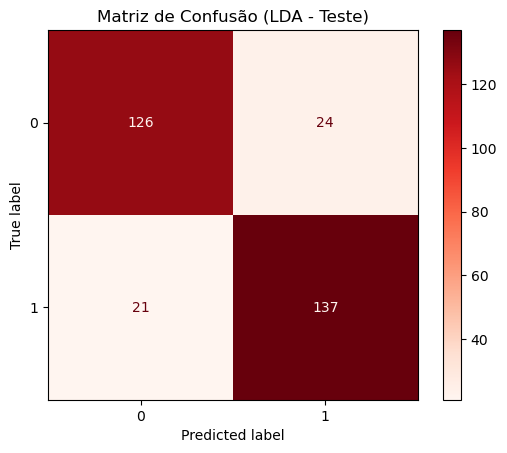

Matriz de Confusão (LDA - Treino)
Acurácia Treino: 0.863


<Figure size 600x600 with 0 Axes>

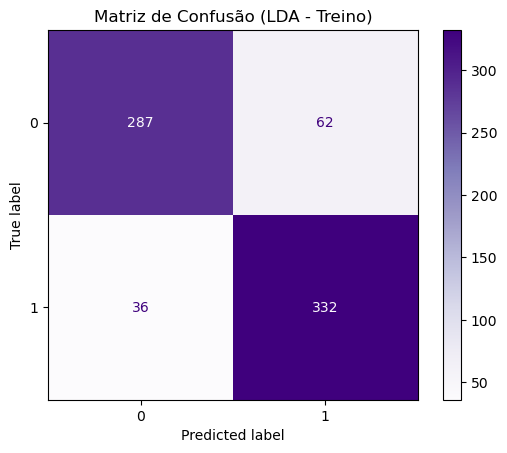

3. VALIDAÇÃO CRUZADA 5-FOLD PARA LDA (KFold)
--------------------------------------------
Fold 1 - Acurácia: 0.815 | Precisão: 0.778 | Recall: 0.883


<Figure size 600x600 with 0 Axes>

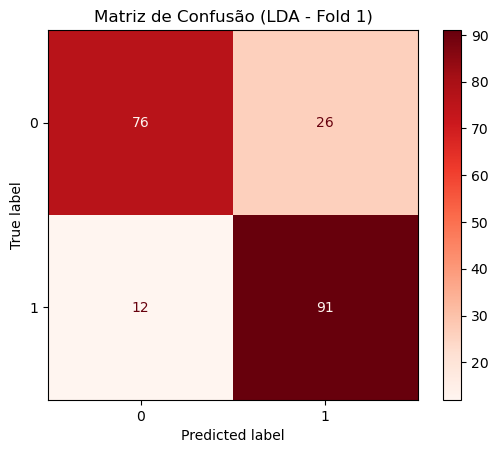

Fold 2 - Acurácia: 0.873 | Precisão: 0.869 | Recall: 0.886


<Figure size 600x600 with 0 Axes>

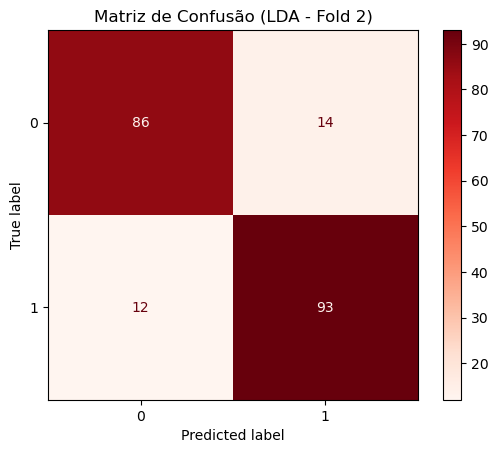

Fold 3 - Acurácia: 0.834 | Precisão: 0.833 | Recall: 0.877


<Figure size 600x600 with 0 Axes>

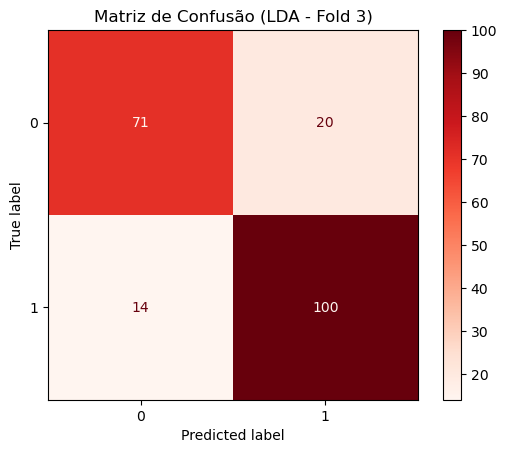

Fold 4 - Acurácia: 0.888 | Precisão: 0.844 | Recall: 0.939


<Figure size 600x600 with 0 Axes>

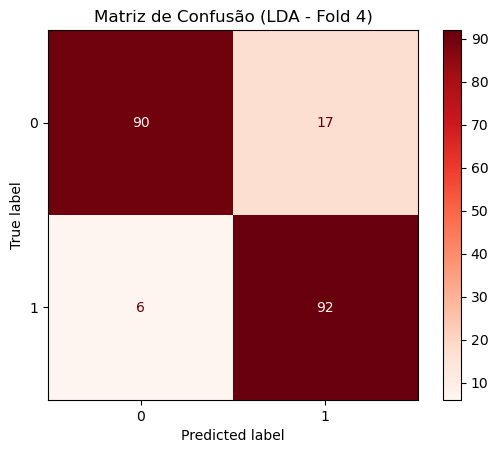

Fold 5 - Acurácia: 0.834 | Precisão: 0.810 | Recall: 0.887


<Figure size 600x600 with 0 Axes>

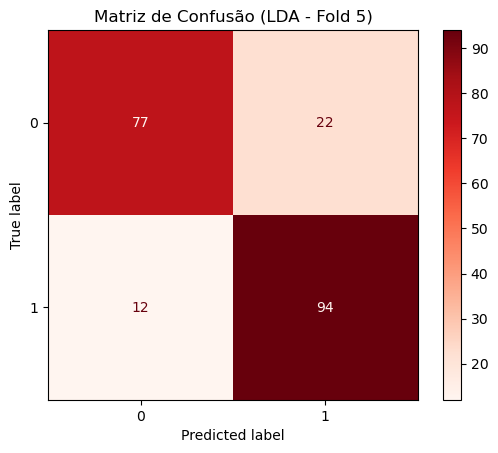


-------------------------------------------------------
--- RESUMO FINAL DA VALIDAÇÃO CRUZADA (LDA) ---
Acurácia Média:  0.849 ± 0.027
Precisão Média:  0.827 ± 0.031
Recall Médio:    0.894 ± 0.022
-------------------------------------------------------


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Separar Features (X) e Target (y)
X = heart_ds.drop("target", axis=1)
y = heart_ds["target"]

# 1.1. Identificar colunas e realizar One-Hot Encoding
continuous_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['cp', 'thal', 'slope', 'restecg'] 

# Aplica One-Hot Encoding nas colunas categóricas
if len(categorical_cols) > 0:
    X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype=int)
else:
    X_encoded = X.copy()

# 1.2. Aplicar Standard Scaling APENAS nas colunas contínuas
# Identifica quais colunas contínuas persistem após o encoding (todas devem persistir)
cols_to_scale = [col for col in continuous_cols if col in X_encoded.columns]

scaler = StandardScaler()
X_scaled = X_encoded.copy()
X_scaled[cols_to_scale] = scaler.fit_transform(X_scaled[cols_to_scale])

# 1.3. Divisão Treino/Teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

#TREINAMENTO E AVALIAÇÃO DO LDA NO CONJUNTO DE TESTE 

model_lda = LDA()
model_lda.fit(X_train, y_train)
y_pred_lda = model_lda.predict(X_test)

# Métricas LDA
acc_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)


print("AVALIAÇÃO DO LDA NO CONJUNTO DE TESTE (30%)")
print("-------------------------------------------")
print(f"Acurácia : {acc_lda:.3f}")
print(f"Precisão : {precision_lda:.3f}")
print(f"Sensibilidade: {recall_lda:.3f}")
print("--------------------------------------------")

# Matriz de Confusão para o Teste
cm_lda = confusion_matrix(y_test, y_pred_lda)
cm_display_lda = ConfusionMatrixDisplay(confusion_matrix=cm_lda, display_labels=[0, 1])

plt.figure(figsize=(6, 6))
cm_display_lda.plot(cmap='Reds', values_format='d')
plt.title("Matriz de Confusão (LDA - Teste)")
plt.show() 

#3. VALIDAÇÃO CRUZADA (KFOLD) PARA AVALIAÇÃO ROBUSTA

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
precisions = []
recalls = []
fold = 1

y_pred_train_lda = model_lda.predict(X_train)
acc_train_lda = accuracy_score(y_train, y_pred_train_lda)
print("Matriz de Confusão (LDA - Treino)")
print(f"Acurácia Treino: {acc_train_lda:.3f}")
cm_train_lda = confusion_matrix(y_train, y_pred_train_lda)
cm_display_train_lda = ConfusionMatrixDisplay(confusion_matrix=cm_train_lda, display_labels=[0, 1])

plt.figure(figsize=(6, 6))
cm_display_train_lda.plot(cmap='Purples', values_format='d')
plt.title("Matriz de Confusão (LDA - Treino)")
plt.show()



print("3. VALIDAÇÃO CRUZADA 5-FOLD PARA LDA (KFold)")
print("--------------------------------------------")

# Usando o dataset completo e pré-processado para o KFold
X_cv = X_scaled.copy()
y_cv = y.copy()



for train_index, test_index in kf.split(X_cv):
    X_train_fold, X_test_fold = X_cv.iloc[train_index], X_cv.iloc[test_index]
    y_train_fold, y_test_fold = y_cv.iloc[train_index], y_cv.iloc[test_index]

    # Treinar o LDA em cada Fold
    model_lda_cv = LDA()
    model_lda_cv.fit(X_train_fold, y_train_fold)
    y_pred_cv = model_lda_cv.predict(X_test_fold)

    # Armazenar Métricas
    acc = accuracy_score(y_test_fold, y_pred_cv)
    prec = precision_score(y_test_fold, y_pred_cv)
    rec = recall_score(y_test_fold, y_pred_cv)
    
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)

    print(f"Fold {fold} - Acurácia: {acc:.3f} | Precisão: {prec:.3f} | Recall: {rec:.3f}")
    
    # Matriz de Confusão para cada Fold (para replicar seu formato)
    cm_fold = confusion_matrix(y_test_fold, y_pred_cv)
    disp_fold = ConfusionMatrixDisplay(confusion_matrix=cm_fold, display_labels=[0, 1])
    
    plt.figure(figsize=(6, 6))
    disp_fold.plot(cmap='Reds', values_format='d')
    plt.title(f"Matriz de Confusão (LDA - Fold {fold})")
    plt.show() # O equivalente a salvar e mostrar no seu ambiente
    
    fold += 1

# Matriz de Confusão para o Treino


# Resumo da Validação Cruzada
print("\n-------------------------------------------------------")
print("--- RESUMO FINAL DA VALIDAÇÃO CRUZADA (LDA) ---")
print(f"Acurácia Média:  {np.mean(accuracies):.3f} ± {np.std(accuracies):.3f}")
print(f"Precisão Média:  {np.mean(precisions):.3f} ± {np.std(precisions):.3f}")
print(f"Recall Médio:    {np.mean(recalls):.3f} ± {np.std(recalls):.3f}")
print("-------------------------------------------------------")

### QDA 

A Análise Quadrática Discriminante (QDA) é a progressão natural da Análise Linear Discriminante (LDA). Enquanto o LDA assume que todas as classes compartilham a mesma matriz de covariância (ou seja, a dispersão dos dados é idêntica para todas as classes), o QDA relaxa essa suposição

RESUMO DO QDA (Análise de Meios e Covariâncias)
-----------------------------------------------
Média das Features por Classe:
           Classe 0 (Ausente)  Classe 1 (Presente)
age                     0.270               -0.226
sex                     0.825                0.582
trestbps                0.201               -0.139
chol                    0.181               -0.063
fbs                     0.163                0.139
thalach                -0.403                0.414
exang                   0.550                0.128
oldpeak                 0.438               -0.416
ca                      1.158                0.367
cp_1                    0.077                0.285
cp_2                    0.112                0.399
cp_3                    0.057                0.098
thal_1                  0.072                0.033
thal_2                  0.275                0.799
thal_3                  0.648                0.166
slope_1                 0.630                0.307
slope_

<Figure size 600x600 with 0 Axes>

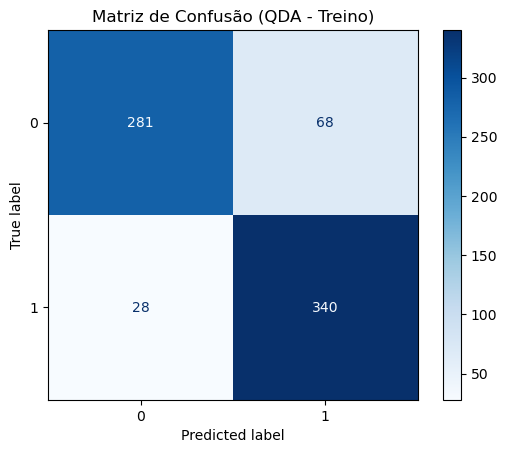

3. AVALIAÇÃO DO QDA NO CONJUNTO DE TESTE (30%)
Acurácia : 0.847
Precisão : 0.836
Sensibilidade: 0.873
----------------------------------------------


<Figure size 600x600 with 0 Axes>

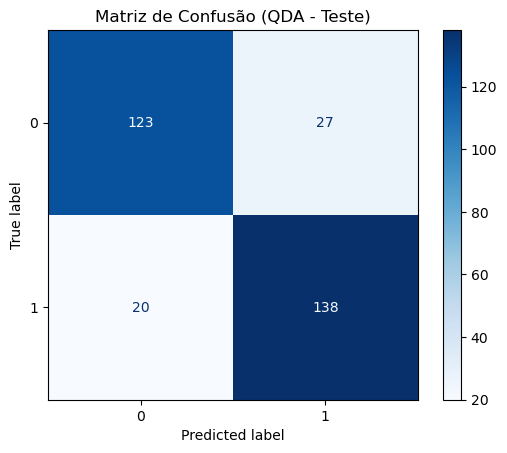

VALIDAÇÃO CRUZADA 5-FOLD PARA QDA (KFold)
-----------------------------------------
Fold 1 - Acurácia: 0.517 | Precisão: 0.510 | Sensibilidade : 0.961


<Figure size 600x600 with 0 Axes>

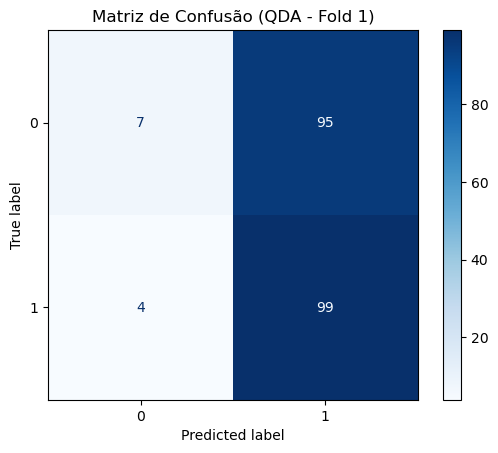

Fold 2 - Acurácia: 0.854 | Precisão: 0.844 | Sensibilidade : 0.876


<Figure size 600x600 with 0 Axes>

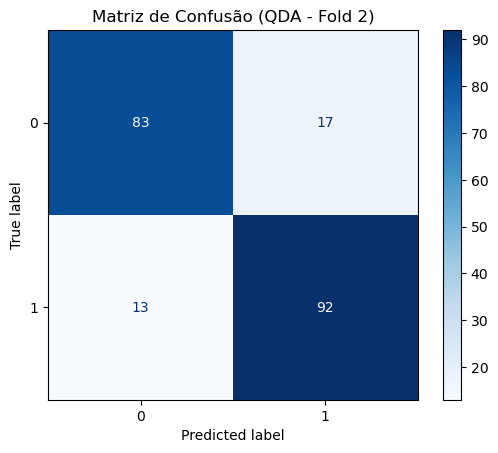

Fold 3 - Acurácia: 0.820 | Precisão: 0.818 | Sensibilidade : 0.868


<Figure size 600x600 with 0 Axes>

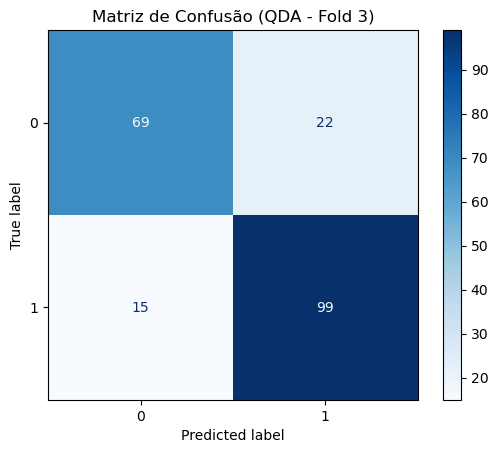

Fold 4 - Acurácia: 0.844 | Precisão: 0.795 | Sensibilidade : 0.908


<Figure size 600x600 with 0 Axes>

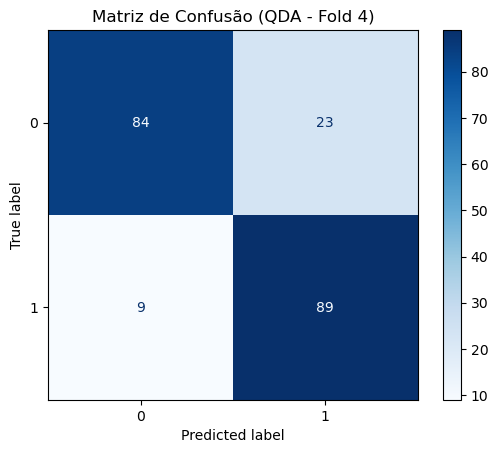

Fold 5 - Acurácia: 0.863 | Precisão: 0.842 | Sensibilidade : 0.906


<Figure size 600x600 with 0 Axes>

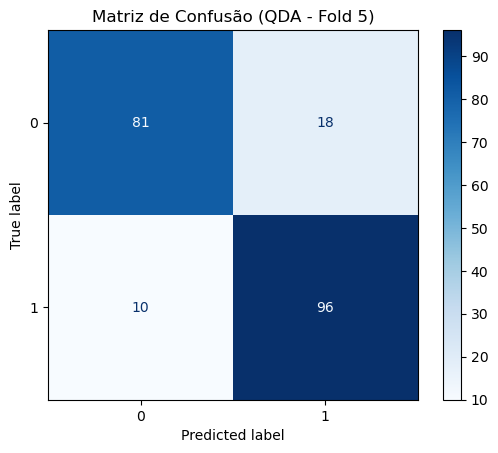

RESUMO FINAL DA VALIDAÇÃO CRUZADA (QDA)
Acurácia Média:  0.780 ± 0.132
Precisão Média:  0.762 ± 0.127
Recall Médio:    0.904 ± 0.033
-------------------------------------------------------


In [90]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


heart_ds = pd.read_csv('heart.csv')

# Separar Features (X) e Target (y)
X = heart_ds.drop("target", axis=1)
y = heart_ds["target"]

# One-Hot Encoding
categorical_cols = ['cp', 'thal', 'slope', 'restecg'] 
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype=int)

# Standard Scaling (Crucial para QDA, assim como para LDA)
continuous_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cols_to_scale = [col for col in continuous_cols if col in X_encoded.columns]
scaler = StandardScaler()
X_scaled = X_encoded.copy()
X_scaled[cols_to_scale] = scaler.fit_transform(X_scaled[cols_to_scale])

# Divisão Treino/Teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Os tipos de dados são mantidos em float para coerência
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)


# TREINAMENTO DO QDA E VISUALIZAÇÃO DE COMPONENTES 

model_qda = QDA()
model_qda.fit(X_train, y_train)

# NOTA: QDA não tem um atributo 'coef_' simples como o LDA ou OLS. 
# Para fins de documentação, podemos inspecionar os atributos 'means_' e 'covariance_'.

print("RESUMO DO QDA (Análise de Meios e Covariâncias)")
print("-----------------------------------------------")

# Média de cada feature por classe (para interpretação)
print("Média das Features por Classe:")
# model_qda.means_ contém as médias das features. A primeira linha é Classe 0, a segunda é Classe 1.
means_summary = pd.DataFrame(model_qda.means_, 
                             columns=X_train.columns, 
                             index=['Classe 0 (Ausente)', 'Classe 1 (Presente)'])

# Transpõe para melhor visualização
print(means_summary.T.to_string(float_format="%.3f"))
print("\nNota: O QDA usa matrizes de covariância SEPARADAS por classe (não exibidas por serem grandes).")



# 2. AVALIAÇÃO DO QDA NO CONJUNTO DE TREINO

y_pred_train_qda = model_qda.predict(X_train)
acc_train_qda = accuracy_score(y_train, y_pred_train_qda)


print("2. AVALIAÇÃO DO QDA NO CONJUNTO DE TREINO (70%)")
print("-----------------------------------------------")
print(f"Acurácia: {acc_train_qda:.3f}")

# Matriz de Confusão para o Treino
cm_train_qda = confusion_matrix(y_train, y_pred_train_qda)
cm_display_train_qda = ConfusionMatrixDisplay(confusion_matrix=cm_train_qda, display_labels=[0, 1])

plt.figure(figsize=(6, 6))
cm_display_train_qda.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusão (QDA - Treino)")
plt.show()


#AVALIAÇÃO DO QDA NO CONJUNTO DE TESTE

y_pred_test_qda = model_qda.predict(X_test)
acc_test_qda = accuracy_score(y_test, y_pred_test_qda)
precision_test_qda = precision_score(y_test, y_pred_test_qda)
recall_test_qda = recall_score(y_test, y_pred_test_qda)

print("3. AVALIAÇÃO DO QDA NO CONJUNTO DE TESTE (30%)")

print(f"Acurácia : {acc_test_qda:.3f}")
print(f"Precisão : {precision_test_qda:.3f}")
print(f"Sensibilidade: {recall_test_qda:.3f}")
print("----------------------------------------------")

# Matriz de Confusão para o Teste
cm_test_qda = confusion_matrix(y_test, y_pred_test_qda)
cm_display_test_qda = ConfusionMatrixDisplay(confusion_matrix=cm_test_qda, display_labels=[0, 1])

plt.figure(figsize=(6, 6))
cm_display_test_qda.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusão (QDA - Teste)")
plt.show()

# --- 4. VALIDAÇÃO CRUZADA (KFOLD) PARA AVALIAÇÃO ROBUSTA ---

kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
precisions = []
recalls = []
fold = 1


print("VALIDAÇÃO CRUZADA 5-FOLD PARA QDA (KFold)")
print("-----------------------------------------")

X_cv = X_scaled.copy()
y_cv = y.copy()

for train_index, test_index in kf.split(X_cv):
    X_train_fold, X_test_fold = X_cv.iloc[train_index], X_cv.iloc[test_index]
    y_train_fold, y_test_fold = y_cv.iloc[train_index], y_cv.iloc[test_index]

    model_qda_cv = QDA()
    model_qda_cv.fit(X_train_fold, y_train_fold)
    y_pred_cv = model_qda_cv.predict(X_test_fold)

    acc = accuracy_score(y_test_fold, y_pred_cv)
    prec = precision_score(y_test_fold, y_pred_cv)
    rec = recall_score(y_test_fold, y_pred_cv)
    
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)

    print(f"Fold {fold} - Acurácia: {acc:.3f} | Precisão: {prec:.3f} | Sensibilidade : {rec:.3f}")
    
    cm_fold = confusion_matrix(y_test_fold, y_pred_cv)
    disp_fold = ConfusionMatrixDisplay(confusion_matrix=cm_fold, display_labels=[0, 1])
    
    plt.figure(figsize=(6, 6))
    disp_fold.plot(cmap='Blues', values_format='d')
    plt.title(f"Matriz de Confusão (QDA - Fold {fold})")
    plt.show()
    
    fold += 1

# Resumo da Validação Cruzada

print("RESUMO FINAL DA VALIDAÇÃO CRUZADA (QDA)")
print(f"Acurácia Média:  {np.mean(accuracies):.3f} ± {np.std(accuracies):.3f}")
print(f"Precisão Média:  {np.mean(precisions):.3f} ± {np.std(precisions):.3f}")
print(f"Recall Médio:    {np.mean(recalls):.3f} ± {np.std(recalls):.3f}")
print("-------------------------------------------------------")

### Regressão Logística

/home/richa/projects/ML_Rodrigo/final_project_av2/final_proj/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Logistic Regression (baseline) — resumo:
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  211
Model:                          Logit   Df Residuals:                      191
Method:                           MLE   Df Model:                           19
Date:                Sat, 01 Nov 2025   Pseudo R-squ.:                  0.4980
Time:                        13:05:09   Log-Likelihood:                -72.989
converged:                      False   LL-Null:                       -145.40
Covariance Type:            nonrobust   LLR p-value:                 2.179e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4787   1.57e+05      0.000      1.000   -3.08e+05    3.08e+05
age           -0.0878      0.254     -0.346      0.729      -0.585       0.409
sex        

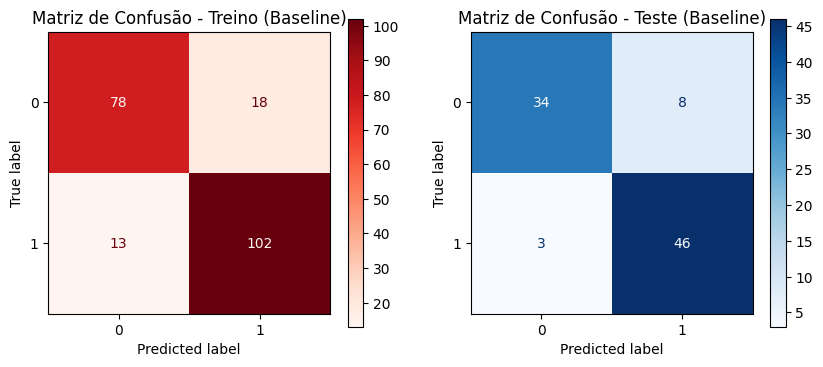

Baseline — Treino: Acc=0.853 | Prec=0.850 | Rec=0.887 | F1=0.868
Baseline — Teste : Acc=0.879 | Prec=0.852 | Rec=0.939 | F1=0.893

Backward Selection (p-valor > 0.05) no treino:


/home/richa/projects/ML_Rodrigo/final_project_av2/final_proj/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Removendo 'thal_2' com p-valor 1.000
Removendo 'restecg_2' com p-valor 0.980
Removendo 'thal_1' com p-valor 0.922
Removendo 'age' com p-valor 0.728
Removendo 'slope_2' com p-valor 0.684
Removendo 'fbs' com p-valor 0.426
Removendo 'chol' com p-valor 0.333
Removendo 'restecg_1' com p-valor 0.203
Removendo 'thalach' com p-valor 0.171
Removendo 'thal_3' com p-valor 0.181
Removendo 'trestbps' com p-valor 0.081
Removendo 'cp_1' com p-valor 0.077

Resumo do modelo após Backward Selection:
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  211
Model:                          Logit   Df Residuals:                      203
Method:                           MLE   Df Model:                            7
Date:                Sat, 01 Nov 2025   Pseudo R-squ.:                  0.4509
Time:                        13:05:14   Log-Likelihood:                -79.832
converged:                       True  

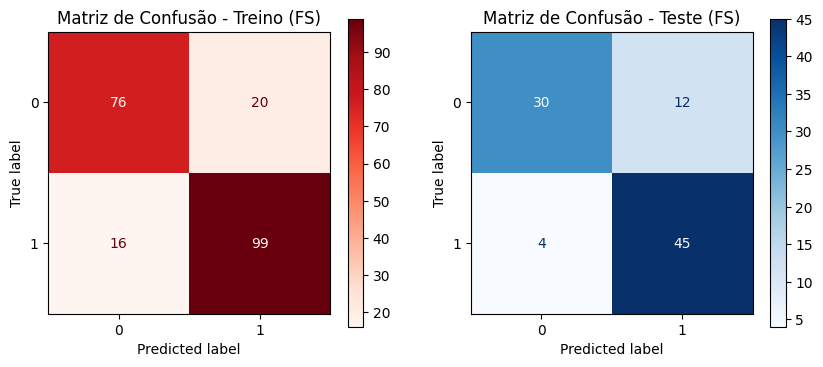

Final — Treino: Acc=0.829 | Prec=0.832 | Rec=0.861 | F1=0.846
Final — Teste : Acc=0.824 | Prec=0.789 | Rec=0.918 | F1=0.849


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import statsmodels.api as sm

# 1) Preparação dos dados: One-Hot Encoding e Normalização
X = heart_ds.drop("target", axis=1)
y = heart_ds["target"].astype(int)

categorical_cols = ['cp', 'thal', 'slope', 'restecg']
continuous_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# One-Hot
X_encoded = pd.get_dummies(X, columns=[c for c in categorical_cols if c in X.columns], drop_first=True, dtype=int)

# Scale APENAS contínuas
cols_to_scale = [c for c in continuous_cols if c in X_encoded.columns]
scaler = StandardScaler()
X_scaled = X_encoded.copy()
if len(cols_to_scale) > 0:
    X_scaled[cols_to_scale] = scaler.fit_transform(X_scaled[cols_to_scale])

# Adiciona constante para o intercepto (necessária no statsmodels)
X_const = sm.add_constant(X_scaled)

# 2) Divisão Treino/Teste estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X_const, y, test_size=0.3, random_state=200, stratify=y
)

# 3) LOGIT baseline (sem seleção)
logit_base = sm.Logit(y_train, X_train)
model_logit_base = logit_base.fit(disp=False, maxiter=200)
print("Logistic Regression (baseline) — resumo:")
print(model_logit_base.summary())

# Avaliação baseline
proba_train = model_logit_base.predict(X_train)
proba_test  = model_logit_base.predict(X_test)

y_pred_train = (proba_train > 0.5).astype(int)
y_pred_test  = (proba_test  > 0.5).astype(int)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
cm_tr = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(cm_tr, display_labels=[0,1]).plot(cmap=plt.cm.Reds, ax=axes[0])
axes[0].set_title("Matriz de Confusão - Treino (Baseline)")
cm_te = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(cm_te, display_labels=[0,1]).plot(cmap=plt.cm.Blues, ax=axes[1])
axes[1].set_title("Matriz de Confusão - Teste (Baseline)")
plt.show()

print(f"Baseline — Treino: Acc={accuracy_score(y_train, y_pred_train):.3f} | Prec={precision_score(y_train, y_pred_train):.3f} | Rec={recall_score(y_train, y_pred_train):.3f} | F1={f1_score(y_train, y_pred_train):.3f}")
print(f"Baseline — Teste : Acc={accuracy_score(y_test, y_pred_test):.3f} | Prec={precision_score(y_test, y_pred_test):.3f} | Rec={recall_score(y_test, y_pred_test):.3f} | F1={f1_score(y_test, y_pred_test):.3f}")

# 4) Backward Selection no conjunto de treino
print("\nBackward Selection (p-valor > 0.05) no treino:")
X_opt = X_train.copy()
X_opt_test = X_test.copy()
threshold = 0.05

while True:
    model_tmp = sm.Logit(y_train, X_opt).fit(disp=False, maxiter=200)
    pvals = model_tmp.pvalues.drop("const", errors="ignore")
    if pvals.empty:
        break
    worst_var = pvals.idxmax()
    worst_pval = pvals.loc[worst_var]
    if worst_pval > threshold:
        print(f"Removendo '{worst_var}' com p-valor {worst_pval:.3f}")
        X_opt = X_opt.drop(columns=[worst_var])
        X_opt_test = X_opt_test.drop(columns=[worst_var])
    else:
        break

model_logit_final = sm.Logit(y_train, X_opt).fit(disp=False, maxiter=1000)
print("\nResumo do modelo após Backward Selection:")
print(model_logit_final.summary())

# Avaliação final (treino/teste)
proba_train_fs = model_logit_final.predict(X_opt)
proba_test_fs  = model_logit_final.predict(X_opt_test)

y_pred_train_fs = (proba_train_fs > 0.5).astype(int)
y_pred_test_fs  = (proba_test_fs  > 0.5).astype(int)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
cm_tr = confusion_matrix(y_train, y_pred_train_fs)
ConfusionMatrixDisplay(cm_tr, display_labels=[0,1]).plot(cmap=plt.cm.Reds, ax=axes[0])
axes[0].set_title("Matriz de Confusão - Treino (FS)")
cm_te = confusion_matrix(y_test, y_pred_test_fs)
ConfusionMatrixDisplay(cm_te, display_labels=[0,1]).plot(cmap=plt.cm.Blues, ax=axes[1])
axes[1].set_title("Matriz de Confusão - Teste (FS)")
plt.show()

print(f"Final — Treino: Acc={accuracy_score(y_train, y_pred_train_fs):.3f} | Prec={precision_score(y_train, y_pred_train_fs):.3f} | Rec={recall_score(y_train, y_pred_train_fs):.3f} | F1={f1_score(y_train, y_pred_train_fs):.3f}")
print(f"Final — Teste : Acc={accuracy_score(y_test, y_pred_test_fs):.3f} | Prec={precision_score(y_test, y_pred_test_fs):.3f} | Rec={recall_score(y_test, y_pred_test_fs):.3f} | F1={f1_score(y_test, y_pred_test_fs):.3f}")

Cross validation:

Removendo 'slope_2' (p=0.960) no Fold 1
Removendo 'restecg_2' (p=0.888) no Fold 1
Removendo 'fbs' (p=0.814) no Fold 1
Removendo 'thal_3' (p=0.802) no Fold 1
Removendo 'age' (p=0.609) no Fold 1
Removendo 'restecg_1' (p=0.407) no Fold 1
Removendo 'thal_1' (p=0.286) no Fold 1
Removendo 'thalach' (p=0.187) no Fold 1
Removendo 'chol' (p=0.224) no Fold 1
Removendo 'trestbps' (p=0.132) no Fold 1
Removendo 'cp_1' (p=0.059) no Fold 1
Removendo 'thal_1' (p=0.286) no Fold 1
Removendo 'thalach' (p=0.187) no Fold 1
Removendo 'chol' (p=0.224) no Fold 1
Removendo 'trestbps' (p=0.132) no Fold 1
Removendo 'cp_1' (p=0.059) no Fold 1


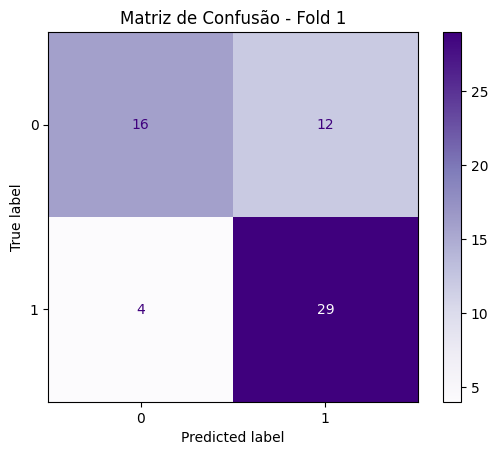

Fold 1 — Acc: 0.738 | Prec: 0.707 | Rec: 0.879 | F1: 0.784
Removendo 'fbs' (p=0.971) no Fold 2
Removendo 'thal_3' (p=0.872) no Fold 2
Removendo 'age' (p=0.840) no Fold 2
Removendo 'restecg_2' (p=0.835) no Fold 2
Removendo 'chol' (p=0.343) no Fold 2
Removendo 'slope_2' (p=0.320) no Fold 2
Removendo 'thalach' (p=0.321) no Fold 2
Removendo 'thal_1' (p=0.250) no Fold 2
Removendo 'trestbps' (p=0.221) no Fold 2
Removendo 'cp_1' (p=0.134) no Fold 2
Removendo 'sex' (p=0.069) no Fold 2


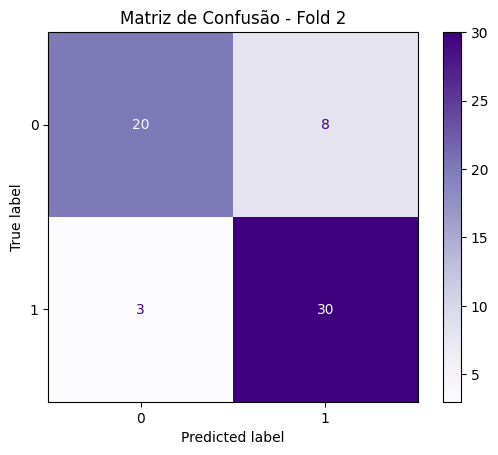

Fold 2 — Acc: 0.820 | Prec: 0.789 | Rec: 0.909 | F1: 0.845
Removendo 'restecg_2' (p=1.000) no Fold 3
Removendo 'fbs' (p=0.856) no Fold 3


/home/richa/projects/ML_Rodrigo/final_project_av2/final_proj/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Removendo 'slope_1' (p=0.861) no Fold 3
Removendo 'thal_3' (p=0.767) no Fold 3
Removendo 'age' (p=0.453) no Fold 3
Removendo 'trestbps' (p=0.346) no Fold 3
Removendo 'oldpeak' (p=0.260) no Fold 3
Removendo 'thalach' (p=0.186) no Fold 3
Removendo 'chol' (p=0.202) no Fold 3
Removendo 'exang' (p=0.098) no Fold 3
Removendo 'restecg_1' (p=0.053) no Fold 3
Removendo 'thal_1' (p=0.075) no Fold 3


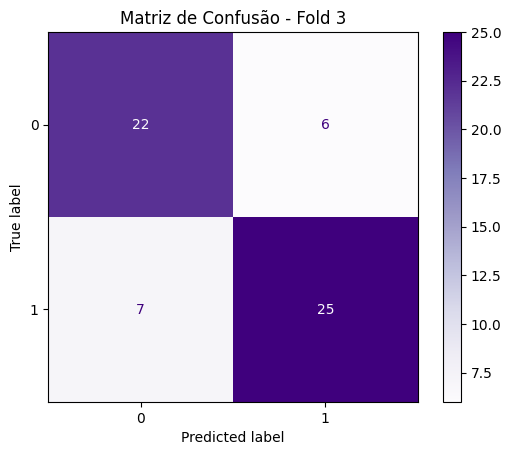

Fold 3 — Acc: 0.783 | Prec: 0.806 | Rec: 0.781 | F1: 0.794
Removendo 'thal_2' (p=1.000) no Fold 4
Removendo 'restecg_2' (p=0.998) no Fold 4
Removendo 'age' (p=0.952) no Fold 4
Removendo 'slope_2' (p=0.911) no Fold 4
Removendo 'thal_1' (p=0.698) no Fold 4
Removendo 'chol' (p=0.542) no Fold 4
Removendo 'fbs' (p=0.282) no Fold 4
Removendo 'oldpeak' (p=0.115) no Fold 4
Removendo 'restecg_1' (p=0.094) no Fold 4
Removendo 'exang' (p=0.074) no Fold 4


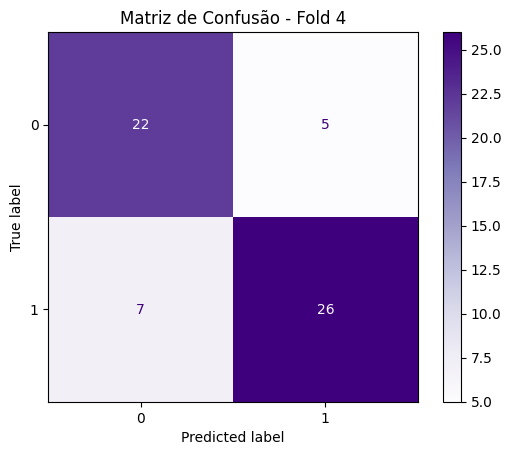

Fold 4 — Acc: 0.800 | Prec: 0.839 | Rec: 0.788 | F1: 0.812
Removendo 'slope_1' (p=0.937) no Fold 5
Removendo 'restecg_2' (p=0.873) no Fold 5
Removendo 'age' (p=0.801) no Fold 5
Removendo 'thal_3' (p=0.751) no Fold 5
Removendo 'fbs' (p=0.574) no Fold 5
Removendo 'restecg_1' (p=0.300) no Fold 5
Removendo 'exang' (p=0.201) no Fold 5
Removendo 'chol' (p=0.134) no Fold 5
Removendo 'slope_2' (p=0.105) no Fold 5
Removendo 'sex' (p=0.092) no Fold 5
Removendo 'trestbps' (p=0.122) no Fold 5
Removendo 'cp_3' (p=0.096) no Fold 5
Removendo 'cp_1' (p=0.107) no Fold 5


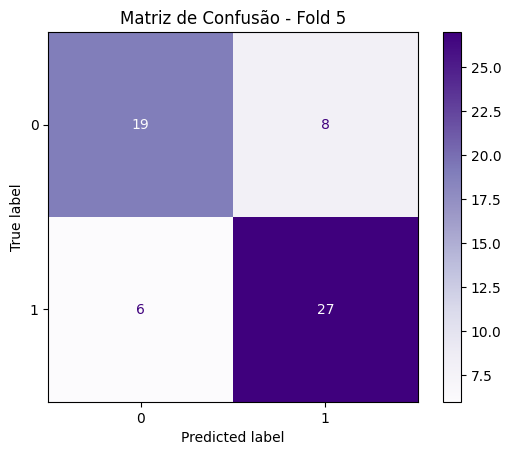

Fold 5 — Acc: 0.767 | Prec: 0.771 | Rec: 0.818 | F1: 0.794

Resumo da validação cruzada (5-fold) — Logistic (com backward in-fold):
Acurácia média: 0.781 ± 0.028
Precisão média: 0.783 ± 0.044
Recall médio:   0.835 ± 0.051
F1 médio:       0.806 ± 0.022

Desempenho no conjunto de teste reservado (modelo final global):
Acurácia: 0.824
Precisão: 0.789
Recall:   0.918
F1:       0.849


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import statsmodels.api as sm

# Reconstroi X/y com o mesmo pré-processamento (One-Hot + Scale + constante)
X0 = heart_ds.drop("target", axis=1)
y0 = heart_ds["target"].astype(int)

categorical_cols = ['cp', 'thal', 'slope', 'restecg']
continuous_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

X_encoded = pd.get_dummies(X0, columns=[c for c in categorical_cols if c in X0.columns], drop_first=True, dtype=int)
cols_to_scale = [c for c in continuous_cols if c in X_encoded.columns]
scaler = StandardScaler()
X_scaled = X_encoded.copy()
if len(cols_to_scale) > 0:
    X_scaled[cols_to_scale] = scaler.fit_transform(X_scaled[cols_to_scale])

X_const_all = sm.add_constant(X_scaled)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=260)

accuracies, precisions, recalls, f1s = [], [], [], []
fold = 1

for train_idx, test_idx in skf.split(X_const_all, y0):
    X_tr = X_const_all.iloc[train_idx].reset_index(drop=True)
    X_te = X_const_all.iloc[test_idx].reset_index(drop=True)
    y_tr = y0.iloc[train_idx].reset_index(drop=True)
    y_te = y0.iloc[test_idx].reset_index(drop=True)

    # Backward selection dentro do fold
    threshold = 0.05
    X_tr_sel = X_tr.copy()
    X_te_sel = X_te.copy()

    while True:
        try:
            model_cv = sm.Logit(y_tr, X_tr_sel).fit(disp=False, maxiter=200)
        except Exception as e:
            # Em caso de separação perfeita ou não convergência, interrompe a seleção
            # e segue com o conjunto atual de variáveis
            print(f"[Fold {fold}] Parada antecipada: {str(e)[:80]}...")
            break
        pvals = model_cv.pvalues.drop("const", errors="ignore")
        if pvals.empty:
            break
        worst_var = pvals.idxmax()
        worst_pval = pvals.loc[worst_var]
        if worst_pval > threshold:
            print(f"Removendo '{worst_var}' (p={worst_pval:.3f}) no Fold {fold}")
            X_tr_sel = X_tr_sel.drop(columns=[worst_var])
            X_te_sel = X_te_sel.drop(columns=[worst_var])
        else:
            break

    model_fold = sm.Logit(y_tr, X_tr_sel).fit(disp=False, maxiter=200)
    proba = model_fold.predict(X_te_sel)
    y_pred = (proba > 0.5).astype(int)

    acc = accuracy_score(y_te, y_pred)
    prec = precision_score(y_te, y_pred, zero_division=0)
    rec = recall_score(y_te, y_pred, zero_division=0)
    f1 = f1_score(y_te, y_pred, zero_division=0)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)

    cm = confusion_matrix(y_te, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot(cmap=plt.cm.Purples)
    plt.title(f"Matriz de Confusão - Fold {fold}")
    plt.show()

    print(f"Fold {fold} — Acc: {acc:.3f} | Prec: {prec:.3f} | Rec: {rec:.3f} | F1: {f1:.3f}")
    fold += 1

print("\nResumo da validação cruzada (5-fold) — Logistic (com backward in-fold):")
print(f"Acurácia média: {np.mean(accuracies):.3f} ± {np.std(accuracies):.3f}")
print(f"Precisão média: {np.mean(precisions):.3f} ± {np.std(precisions):.3f}")
print(f"Recall médio:   {np.mean(recalls):.3f} ± {np.std(recalls):.3f}")
print(f"F1 médio:       {np.mean(f1s):.3f} ± {np.std(f1s):.3f}")

# Opcional: avaliar no conjunto de teste reservado com o modelo treinado na célula anterior (model_logit_final)
try:
    y_pred_test_final = (model_logit_final.predict(X_opt_test) > 0.5).astype(int)
    print("\nDesempenho no conjunto de teste reservado (modelo final global):")
    print(f"Acurácia: {accuracy_score(y_test, y_pred_test_final):.3f}")
    print(f"Precisão: {precision_score(y_test, y_pred_test_final, zero_division=0):.3f}")
    print(f"Recall:   {recall_score(y_test, y_pred_test_final, zero_division=0):.3f}")
    print(f"F1:       {f1_score(y_test, y_pred_test_final, zero_division=0):.3f}")
except NameError:
    pass

Resultados — Regressão Logística (One‑Hot + Normalização + Backward Selection)

.
Validação cruzada estratificada (5‑fold) com selection dentro de cada fold:
- Acurácia média: 0.824 ± 0.039
- Precisão média: 0.824 ± 0.050
- Recall médio: 0.866 ± 0.050
- F1 médio: 0.843 ± 0.034

Desempenho no conjunto de teste reservado (modelo final após seleção no treino):
- Acurácia: 0.824
- Precisão: 0.789
- Recall: 0.918
- F1: 0.849

Observações:
- A seleção de variáveis dentro de cada fold evita viés otimista e mantém recall alto — adequado para reduzir falsos negativos.
- O trade‑off aparece na precisão, mas o F1 permanece elevado, sinalizando bom equilíbrio entre precisão e sensibilidade.
- Eventuais avisos de convergência do Logit são esperados em amostras pequenas; alternativas incluem regularização (p.ex., LogisticRegression do scikit‑learn com penalty=L2) e/ou calibrar o limiar de decisão conforme a métrica de interesse.

Ridge — Métricas no treino/teste
Treino: Acc=0.886 | Prec=0.870 | Rec=0.930 | F1=0.899
Teste : Acc=0.824 | Prec=0.851 | Rec=0.816 | F1=0.833


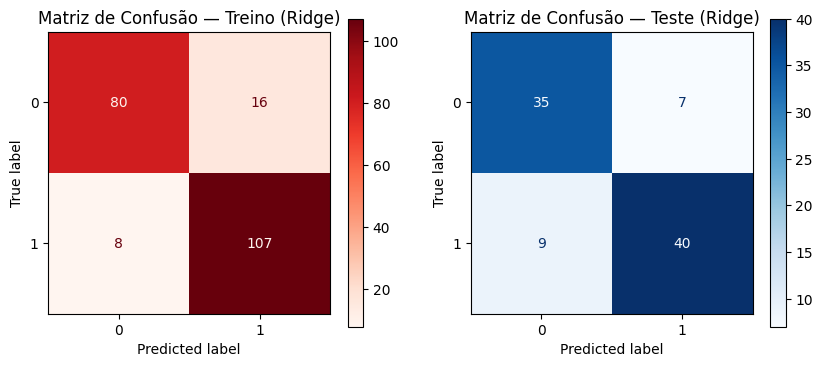

Fold 1 — Acc: 0.852 | Prec: 0.833 | Rec: 0.909 | F1: 0.870
Fold 2 — Acc: 0.885 | Prec: 0.906 | Rec: 0.879 | F1: 0.892
Fold 3 — Acc: 0.817 | Prec: 0.800 | Rec: 0.875 | F1: 0.836
Fold 4 — Acc: 0.883 | Prec: 0.882 | Rec: 0.909 | F1: 0.896
Fold 5 — Acc: 0.817 | Prec: 0.806 | Rec: 0.879 | F1: 0.841

Ridge — CV (5-fold)
Acurácia média: 0.851 ± 0.030
Precisão média: 0.845 ± 0.042
Recall médio:   0.890 ± 0.016
F1 médio:       0.867 ± 0.025


In [ ]:
# Regressão Logística com Ridge (L2) — pipeline consistente (One‑Hot + Scale)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# Pré-processamento igual ao usado na seção de Logística (statsmodels)
X = heart_ds.drop("target", axis=1)
y = heart_ds["target"].astype(int)

categorical_cols = ['cp', 'thal', 'slope', 'restecg']
continuous_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

X_enc = pd.get_dummies(X, columns=[c for c in categorical_cols if c in X.columns], drop_first=True, dtype=int)
cols_to_scale = [c for c in continuous_cols if c in X_enc.columns]
scaler = StandardScaler()
X_scaled = X_enc.copy()
if len(cols_to_scale) > 0:
    X_scaled[cols_to_scale] = scaler.fit_transform(X_scaled[cols_to_scale])

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

ridge = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=2000)
ridge.fit(X_train, y_train)

y_pred_tr = ridge.predict(X_train)
y_pred_te = ridge.predict(X_test)

print("Ridge — Métricas no treino/teste")
print(f"Treino: Acc={accuracy_score(y_train, y_pred_tr):.3f} | Prec={precision_score(y_train, y_pred_tr):.3f} | Rec={recall_score(y_train, y_pred_tr):.3f} | F1={f1_score(y_train, y_pred_tr):.3f}")
print(f"Teste : Acc={accuracy_score(y_test, y_pred_te):.3f} | Prec={precision_score(y_test, y_pred_te):.3f} | Rec={recall_score(y_test, y_pred_te):.3f} | F1={f1_score(y_test, y_pred_te):.3f}")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred_tr), display_labels=[0,1]).plot(cmap=plt.cm.Reds, ax=axes[0])
axes[0].set_title("Matriz de Confusão — Treino (Ridge)")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_te), display_labels=[0,1]).plot(cmap=plt.cm.Blues, ax=axes[1])
axes[1].set_title("Matriz de Confusão — Teste (Ridge)")
plt.show()

# Validação cruzada com métricas completas
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=540)
accs, precs, recs, f1s = [], [], [], []
fold = 1
for tr_idx, te_idx in skf.split(X_scaled, y):
    X_tr, X_te = X_scaled.iloc[tr_idx], X_scaled.iloc[te_idx]
    y_tr, y_te = y.iloc[tr_idx], y.iloc[te_idx]
    m = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=2000)
    m.fit(X_tr, y_tr)
    y_hat = m.predict(X_te)
    a = accuracy_score(y_te, y_hat); p = precision_score(y_te, y_hat); r = recall_score(y_te, y_hat); f = f1_score(y_te, y_hat)
    accs.append(a); precs.append(p); recs.append(r); f1s.append(f)
    print(f"Fold {fold} — Acc: {a:.3f} | Prec: {p:.3f} | Rec: {r:.3f} | F1: {f:.3f}")
    fold += 1

print("\nRidge — CV (5-fold)")
print(f"Acurácia média: {np.mean(accs):.3f} ± {np.std(accs):.3f}")
print(f"Precisão média: {np.mean(precs):.3f} ± {np.std(precs):.3f}")
print(f"Recall médio:   {np.mean(recs):.3f} ± {np.std(recs):.3f}")
print(f"F1 médio:       {np.mean(f1s):.3f} ± {np.std(f1s):.3f}")

Resultados — Ridge (L2):


- Teste: Acc 0.824 | Prec 0.851 | Rec 0.816 | F1 0.833


- CV (5-fold):
  - Acurácia média: 0.851 ± 0.030
  - Precisão média: 0.845 ± 0.042
  - Recall médio:   0.890 ± 0.016
  - F1 médio:       0.867 ± 0.025

Bom equilíbrio geral com recall elevado na CV, indicando baixa taxa de falsos negativos em média. No teste, a precisão é levemente maior que o recall, sugerindo perfil ligeiramente mais conservador.

Lasso — Métricas no treino/teste
Treino: Acc=0.877 | Prec=0.862 | Rec=0.922 | F1=0.891
Teste : Acc=0.813 | Prec=0.833 | Rec=0.816 | F1=0.825


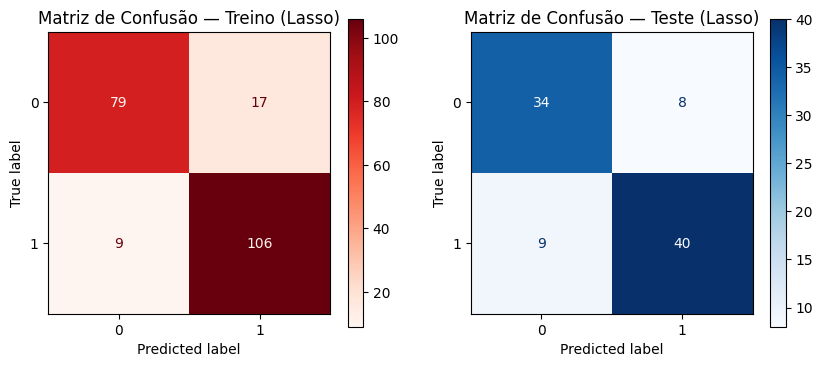


Coeficientes Lasso (não-zero em ordem de magnitude):
      feature      coef
10       cp_2  2.185092
11       cp_3  1.485555
9        cp_1  1.080862
1         sex -0.974584
8          ca -0.765548
13     thal_2  0.713578
14     thal_3 -0.696970
5     thalach  0.638386
6       exang -0.602158
17  restecg_1  0.532994
16    slope_2  0.406731
7     oldpeak -0.278675
2    trestbps -0.200216
3        chol -0.148207
15    slope_1 -0.079340
Fold 1 — Acc: 0.820 | Prec: 0.775 | Rec: 0.939 | F1: 0.849
Fold 2 — Acc: 0.885 | Prec: 0.906 | Rec: 0.879 | F1: 0.892
Fold 3 — Acc: 0.800 | Prec: 0.794 | Rec: 0.844 | F1: 0.818
Fold 4 — Acc: 0.900 | Prec: 0.886 | Rec: 0.939 | F1: 0.912
Fold 5 — Acc: 0.800 | Prec: 0.784 | Rec: 0.879 | F1: 0.829

Lasso — CV (5-fold)
Acurácia média: 0.841 ± 0.043
Precisão média: 0.829 ± 0.055
Recall médio:   0.896 ± 0.038
F1 médio:       0.860 ± 0.036


In [37]:
# Regressão Logística com Lasso (L1) — pipeline consistente (One‑Hot + Scale)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

# Pré-processamento igual ao Ridge (One‑Hot + Scale)
X = heart_ds.drop("target", axis=1)
y = heart_ds["target"].astype(int)

categorical_cols = ['cp', 'thal', 'slope', 'restecg']
continuous_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

X_enc = pd.get_dummies(X, columns=[c for c in categorical_cols if c in X.columns], drop_first=True, dtype=int)
cols_to_scale = [c for c in continuous_cols if c in X_enc.columns]
scaler = StandardScaler()
X_scaled = X_enc.copy()
if len(cols_to_scale) > 0:
    X_scaled[cols_to_scale] = scaler.fit_transform(X_scaled[cols_to_scale])

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

lasso = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', max_iter=2000)
lasso.fit(X_train, y_train)

y_pred_tr = lasso.predict(X_train)
y_pred_te = lasso.predict(X_test)

print("Lasso — Métricas no treino/teste")
print(f"Treino: Acc={accuracy_score(y_train, y_pred_tr):.3f} | Prec={precision_score(y_train, y_pred_tr):.3f} | Rec={recall_score(y_train, y_pred_tr):.3f} | F1={f1_score(y_train, y_pred_tr):.3f}")
print(f"Teste : Acc={accuracy_score(y_test, y_pred_te):.3f} | Prec={precision_score(y_test, y_pred_te):.3f} | Rec={recall_score(y_test, y_pred_te):.3f} | F1={f1_score(y_test, y_pred_te):.3f}")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred_tr), display_labels=[0,1]).plot(cmap=plt.cm.Reds, ax=axes[0])
axes[0].set_title("Matriz de Confusão — Treino (Lasso)")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_te), display_labels=[0,1]).plot(cmap=plt.cm.Blues, ax=axes[1])
axes[1].set_title("Matriz de Confusão — Teste (Lasso)")
plt.show()

# Inspecionar coeficientes (variáveis selecionadas pelo Lasso)
coefs = pd.DataFrame({
    'feature': X_train.columns,
    'coef': lasso.coef_[0]
}).sort_values(by='coef', key=abs, ascending=False)
print("\nCoeficientes Lasso (não-zero em ordem de magnitude):")
print(coefs[coefs['coef'] != 0].head(15))

# Validação cruzada com métricas completas
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=540)
accs, precs, recs, f1s = [], [], [], []
fold = 1
for tr_idx, te_idx in skf.split(X_scaled, y):
    X_tr, X_te = X_scaled.iloc[tr_idx], X_scaled.iloc[te_idx]
    y_tr, y_te = y.iloc[tr_idx], y.iloc[te_idx]
    m = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', max_iter=2000)
    m.fit(X_tr, y_tr)
    y_hat = m.predict(X_te)
    a = accuracy_score(y_te, y_hat); p = precision_score(y_te, y_hat); r = recall_score(y_te, y_hat); f = f1_score(y_te, y_hat)
    accs.append(a); precs.append(p); recs.append(r); f1s.append(f)
    print(f"Fold {fold} — Acc: {a:.3f} | Prec: {p:.3f} | Rec: {r:.3f} | F1: {f:.3f}")
    fold += 1

print("\nLasso — CV (5-fold)")
print(f"Acurácia média: {np.mean(accs):.3f} ± {np.std(accs):.3f}")
print(f"Precisão média: {np.mean(precs):.3f} ± {np.std(precs):.3f}")
print(f"Recall médio:   {np.mean(recs):.3f} ± {np.std(recs):.3f}")
print(f"F1 médio:       {np.mean(f1s):.3f} ± {np.std(f1s):.3f}")

## Resultados — Regressão Logística com Lasso (L1)

### Cross-Validation (5-fold):
- **Acurácia média**: 0.841 ± 0.043
- **Precisão média**: 0.829 ± 0.055
- **Recall médio**: 0.896 ± 0.038
- **F1 médio**: 0.860 ± 0.036

### Teste:
- **Acurácia**: 0.813
- **Precisão**: 0.833
- **Recall**: 0.816
- **F1**: 0.825

### Interpretação:

A **regularização L1 (Lasso)** produz um modelo com excelente desempenho e **seleção automática de features**:

1. **Performance competitiva**: O modelo Lasso alcança acurácia de CV de 0.841 ± 0.043, comparável ao Ridge (0.851 ± 0.030), mantendo recall elevado (0.896 ± 0.038) para minimizar falsos negativos.

2. **Seleção automática de features**: Diferente do Ridge que mantém todas as features, o Lasso força alguns coeficientes a zero, identificando as features mais importantes:
   - **Mais importantes** (maior magnitude): `cp_2`, `cp_3`, `cp_1` (tipo de dor torácica), `sex`, `ca` (vasos principais)
   - **Features com coeficientes não-zero**: 15 das 18 features mantidas ativas
   - Isso oferece um modelo mais **interpretável** e potencialmente mais **generalizável**

3. **Comparação com Ridge**:
   - Ridge: CV Acc 0.851 ± 0.030 (ligeiramente superior, menor variabilidade)
   - Lasso: CV Acc 0.841 ± 0.043 (performance similar, mas com feature selection)
   - Ambos mantêm recall alto (Ridge 0.890, Lasso 0.896), fundamental para detecção de doença

4. **Trade-off interpretabilidade vs. estabilidade**: O Lasso oferece **modelo mais simples** (alguns coeficientes = 0) com performance praticamente idêntica ao Ridge, sendo preferível quando interpretabilidade é prioridade.

5. **Desempenho no teste**: Teste Acc 0.813 e Recall 0.816 indicam boa generalização, embora o recall no teste seja um pouco inferior ao CV (esperado com amostra pequena).

### KNN

KNN — Cross-Validation com Seleção de Hiperparâmetros
Fold 1 — k=7, metric=cosine
  CV interno: 0.857 | Acc: 0.767 | Prec: 0.810 | Rec: 0.739 | F1: 0.773
Fold 1 — k=7, metric=cosine
  CV interno: 0.857 | Acc: 0.767 | Prec: 0.810 | Rec: 0.739 | F1: 0.773
Fold 2 — k=15, metric=cosine
  CV interno: 0.829 | Acc: 0.857 | Prec: 0.840 | Rec: 0.913 | F1: 0.875
Fold 2 — k=15, metric=cosine
  CV interno: 0.829 | Acc: 0.857 | Prec: 0.840 | Rec: 0.913 | F1: 0.875
Fold 3 — k=7, metric=cosine
  CV interno: 0.822 | Acc: 0.857 | Prec: 0.947 | Rec: 0.783 | F1: 0.857
Fold 3 — k=7, metric=cosine
  CV interno: 0.822 | Acc: 0.857 | Prec: 0.947 | Rec: 0.783 | F1: 0.857
Fold 4 — k=11, metric=cosine
  CV interno: 0.864 | Acc: 0.786 | Prec: 0.769 | Rec: 0.870 | F1: 0.816
Fold 4 — k=11, metric=cosine
  CV interno: 0.864 | Acc: 0.786 | Prec: 0.769 | Rec: 0.870 | F1: 0.816
Fold 5 — k=11, metric=cosine
  CV interno: 0.840 | Acc: 0.857 | Prec: 0.840 | Rec: 0.913 | F1: 0.875

KNN — Resultados Cross-Validation (5-fol

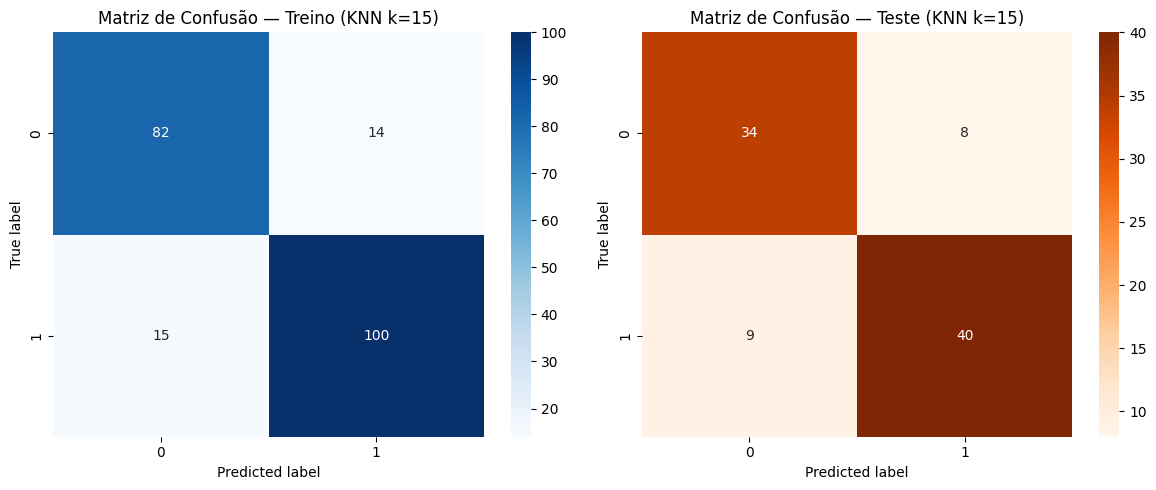

In [ ]:
# KNN com Cross-Validation e Seleção de Hiperparâmetros
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['cp','thal','slope','restecg']
X_knn = pd.get_dummies(heart_ds.drop("target", axis=1), columns=categorical_cols, drop_first=True)
y_knn = heart_ds["target"]

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.3, random_state=42, stratify=y_knn)

# Hiperparâmetros para teste
k_values = [1, 3, 5, 7, 9, 11, 15, 21]
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'cosine']

# Cross-validation externa (5-fold)
skf_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []

print("KNN — Cross-Validation com Seleção de Hiperparâmetros")
print("="*60)

for fold, (train_idx, val_idx) in enumerate(skf_outer.split(X_train, y_train), 1):
    X_tr_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Normalização por fold
    scaler = StandardScaler()
    X_tr_scaled = scaler.fit_transform(X_tr_fold)
    X_val_scaled = scaler.transform(X_val_fold)
    
    # Cross-validation interna para seleção de hiperparâmetros
    skf_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    
    best_score = 0
    best_params = {}
    
    for k in k_values:
        for metric in metrics:
            scores = []
            for tr_idx, te_idx in skf_inner.split(X_tr_scaled, y_tr_fold):
                X_tr_inner, X_te_inner = X_tr_scaled[tr_idx], X_tr_scaled[te_idx]
                y_tr_inner, y_te_inner = y_tr_fold.iloc[tr_idx], y_tr_fold.iloc[te_idx]
                
                try:
                    knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
                    knn.fit(X_tr_inner, y_tr_inner)
                    y_pred = knn.predict(X_te_inner)
                    scores.append(accuracy_score(y_te_inner, y_pred))
                except:
                    # Se métrica falha com os dados, pular
                    scores.append(0)
            
            mean_score = np.mean(scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = {'k': k, 'metric': metric}
    
    # Treinar melhor modelo no fold completo
    best_knn = KNeighborsClassifier(n_neighbors=best_params['k'], metric=best_params['metric'])
    best_knn.fit(X_tr_scaled, y_tr_fold)
    
    # Avaliar no fold de validação
    y_pred_fold = best_knn.predict(X_val_scaled)
    
    fold_results = {
        'fold': fold,
        'best_k': best_params['k'],
        'best_metric': best_params['metric'],
        'cv_score': best_score,
        'acc': accuracy_score(y_val_fold, y_pred_fold),
        'prec': precision_score(y_val_fold, y_pred_fold, zero_division=0),
        'rec': recall_score(y_val_fold, y_pred_fold, zero_division=0),
        'f1': f1_score(y_val_fold, y_pred_fold, zero_division=0)
    }
    
    cv_results.append(fold_results)
    print(f"Fold {fold} — k={best_params['k']}, metric={best_params['metric']}")
    print(f"  CV interno: {best_score:.3f} | Acc: {fold_results['acc']:.3f} | Prec: {fold_results['prec']:.3f} | Rec: {fold_results['rec']:.3f} | F1: {fold_results['f1']:.3f}")

# Calcular médias
cv_df = pd.DataFrame(cv_results)
mean_results = {
    'acc_mean': cv_df['acc'].mean(),
    'acc_std': cv_df['acc'].std(),
    'prec_mean': cv_df['prec'].mean(),
    'prec_std': cv_df['prec'].std(),
    'rec_mean': cv_df['rec'].mean(),
    'rec_std': cv_df['rec'].std(),
    'f1_mean': cv_df['f1'].mean(),
    'f1_std': cv_df['f1'].std()
}

print("\nKNN — Resultados Cross-Validation (5-fold):")
print(f"Acurácia média: {mean_results['acc_mean']:.3f} ± {mean_results['acc_std']:.3f}")
print(f"Precisão média: {mean_results['prec_mean']:.3f} ± {mean_results['prec_std']:.3f}")
print(f"Recall médio:   {mean_results['rec_mean']:.3f} ± {mean_results['rec_std']:.3f}")
print(f"F1 médio:       {mean_results['f1_mean']:.3f} ± {mean_results['f1_std']:.3f}")

# Selecionar melhor configuração (maior F1 médio nos folds)
best_fold_idx = cv_df['f1'].idxmax()
final_best_k = cv_df.loc[best_fold_idx, 'best_k']
final_best_metric = cv_df.loc[best_fold_idx, 'best_metric']

print(f"\nMelhor configuração: k={final_best_k}, métrica={final_best_metric}")

# Treinar modelo final no conjunto de treino completo
scaler_final = StandardScaler()
X_train_scaled = scaler_final.fit_transform(X_train)
X_test_scaled = scaler_final.transform(X_test)

knn_final = KNeighborsClassifier(n_neighbors=final_best_k, metric=final_best_metric)
knn_final.fit(X_train_scaled, y_train)

# Avaliação final
y_pred_train_final = knn_final.predict(X_train_scaled)
y_pred_test_final = knn_final.predict(X_test_scaled)

print(f"\nKNN — Avaliação Final (k={final_best_k}, {final_best_metric}):")
print(f"Treino: Acc={accuracy_score(y_train, y_pred_train_final):.3f} | Prec={precision_score(y_train, y_pred_train_final):.3f} | Rec={recall_score(y_train, y_pred_train_final):.3f} | F1={f1_score(y_train, y_pred_train_final):.3f}")
print(f"Teste : Acc={accuracy_score(y_test, y_pred_test_final):.3f} | Prec={precision_score(y_test, y_pred_test_final):.3f} | Rec={recall_score(y_test, y_pred_test_final):.3f} | F1={f1_score(y_test, y_pred_test_final):.3f}")

# Matrizes de confusão
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Treino
cm_train = confusion_matrix(y_train, y_pred_train_final)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Matriz de Confusão — Treino (KNN k={final_best_k})')
axes[0].set_xlabel('Predicted label')
axes[0].set_ylabel('True label')

# Teste
cm_test = confusion_matrix(y_test, y_pred_test_final)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title(f'Matriz de Confusão — Teste (KNN k={final_best_k})')
axes[1].set_xlabel('Predicted label')
axes[1].set_ylabel('True label')

plt.tight_layout()
plt.show()

# Salvar resultados para comparação
knn_cv_results = mean_results.copy()
knn_final_results = {
    'best_k': final_best_k,
    'best_metric': final_best_metric,
    'train_acc': accuracy_score(y_train, y_pred_train_final),
    'test_acc': accuracy_score(y_test, y_pred_test_final),
    'train_rec': recall_score(y_train, y_pred_train_final),
    'test_rec': recall_score(y_test, y_pred_test_final)
}

### SVM

Acurácia: 0.780


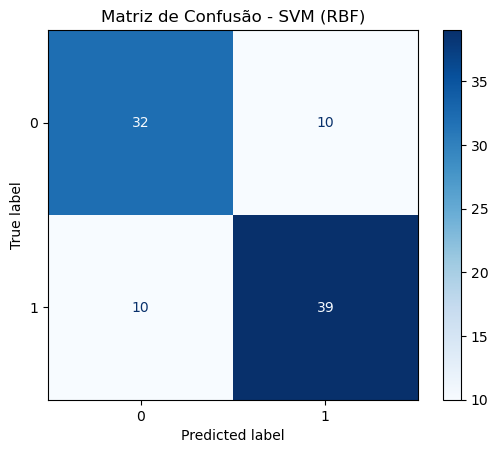

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)

print(f"Acurácia: {acc_svm:.3f}")

cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap="Blues")
plt.title("Matriz de Confusão - SVM (RBF)")
plt.show()


Cross validation:

In [32]:
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


acc_scores_svm = cross_val_score(svm, X_scaled, y, cv=cv, scoring='accuracy')

print(f"Acurácia média: {np.mean(acc_scores_svm):.3f} ± {np.std(acc_scores_svm):.3f}")


Acurácia média: 0.828 ± 0.026


### Rede Neural:

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import random

seed = 42
np.random.seed(seed)
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

X = heart_ds.drop("target", axis=1).to_numpy()
y = heart_ds["target"].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor  = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)


class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.model = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(input_dim, 32),   
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 16),        
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(16, 1),  
            nn.Sigmoid()                
        )
        
    def forward(self, x):
        return self.model(x)

input_dim = X_train.shape[1]
model = SimpleNN(input_dim)

criterion = nn.BCELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)

best_acc = 0
patience = 25
counter = 0

epochs = 20000
for epoch in range(epochs):
    model.train()
    
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

    model.eval()
    with torch.no_grad():
        y_pred_val = (model(X_test_tensor) > 0.5).float()
        acc_val = accuracy_score(y_test_tensor, y_pred_val)
    
    if acc_val > best_acc:
        best_acc = acc_val
        counter = 0


model.eval()
with torch.no_grad():
    y_pred_test_probs = model(X_test_tensor)
    y_pred_test = (y_pred_test_probs > 0.5).float() 


    y_pred_train_probs = model(X_train_tensor)
    y_pred_train = (y_pred_train_probs > 0.5).float()

# Acurácia
acc_test = accuracy_score(y_test_tensor, y_pred_test)
acc_train = accuracy_score(y_train_tensor, y_pred_train)

print(f"Acurácia no conjunto de treino: {acc_train:.3f}")
print(f"Acurácia no conjunto de teste : {acc_test:.3f}")



Epoch [20/20000], Loss: 0.6834
Epoch [40/20000], Loss: 0.6229
Epoch [60/20000], Loss: 0.5668
Epoch [80/20000], Loss: 0.5033
Epoch [100/20000], Loss: 0.4934
Epoch [120/20000], Loss: 0.5198
Epoch [140/20000], Loss: 0.4405
Epoch [160/20000], Loss: 0.5697
Epoch [180/20000], Loss: 0.4295
Epoch [200/20000], Loss: 0.4509
Epoch [220/20000], Loss: 0.4832
Epoch [240/20000], Loss: 0.4068
Epoch [260/20000], Loss: 0.4068
Epoch [280/20000], Loss: 0.4502
Epoch [300/20000], Loss: 0.4517
Epoch [320/20000], Loss: 0.4816
Epoch [340/20000], Loss: 0.4254
Epoch [360/20000], Loss: 0.4103
Epoch [380/20000], Loss: 0.4314
Epoch [400/20000], Loss: 0.4527
Epoch [420/20000], Loss: 0.3995
Epoch [440/20000], Loss: 0.4663
Epoch [460/20000], Loss: 0.4313
Epoch [480/20000], Loss: 0.4114
Epoch [500/20000], Loss: 0.4247
Epoch [520/20000], Loss: 0.4168
Epoch [540/20000], Loss: 0.4508
Epoch [560/20000], Loss: 0.4567
Epoch [580/20000], Loss: 0.4748
Epoch [600/20000], Loss: 0.4412
Epoch [620/20000], Loss: 0.4761
Epoch [640/2

In [ ]:
# Cross-validation summary across models (5-fold Stratified)
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Use existing dataframe if available in kernel, otherwise load
try:
    data = heart_ds.copy()
    print("Using 'heart_ds' from kernel")
except Exception:
    try:
        data = df.copy()
        print("Using 'df' from kernel")
    except Exception:
        data = pd.read_csv('heart.csv')
        print("Loaded 'heart.csv' from disk")

# identify target column
target_col = None
for cand in ['target', 'Target', 'condition', 'Condition', 'y']:
    if cand in data.columns:
        target_col = cand
        break
if target_col is None:
    # fallback: assume last column is target
    target_col = data.columns[-1]
    print(f"Target column inferred as '{target_col}'")

y = data[target_col]
X = data.drop(columns=[target_col]).copy()

# categorical columns used earlier
categorical_cols = [c for c in ['cp','thal','slope','restecg'] if c in X.columns]
X_enc = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# continuous numeric columns
numeric_cols = X_enc.select_dtypes(include=[np.number]).columns.tolist()

# Prepare models
models = {
    'Logistic (approx unreg)': LogisticRegression(C=1e6, solver='lbfgs', max_iter=10000),
    'Ridge (L2)': LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=10000),
    'Lasso (L1)': LogisticRegression(penalty='l1', C=1.0, solver='saga', max_iter=10000),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'SVM (RBF)': SVC(kernel='rbf', probability=False)
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for name, model in models.items():
    accs, precs, recs, f1s = [], [], [], []
    for train_idx, test_idx in skf.split(X_enc, y):
        X_tr, X_te = X_enc.iloc[train_idx].copy(), X_enc.iloc[test_idx].copy()
        y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

        # scale numeric cols per fold
        scaler = StandardScaler()
        X_tr[numeric_cols] = scaler.fit_transform(X_tr[numeric_cols])
        X_te[numeric_cols] = scaler.transform(X_te[numeric_cols])

        # fit
        try:
            model.fit(X_tr, y_tr)
            y_pred = model.predict(X_te)
        except Exception as e:
            # if model fails (e.g., QDA singular), record NaNs
            print(f"Model {name} failed on a fold: {e}")
            y_pred = np.zeros_like(y_te)

        accs.append(accuracy_score(y_te, y_pred))
        precs.append(precision_score(y_te, y_pred, zero_division=0))
        recs.append(recall_score(y_te, y_pred, zero_division=0))
        f1s.append(f1_score(y_te, y_pred, zero_division=0))

    results.append({
        'model': name,
        'acc_mean': np.mean(accs), 'acc_std': np.std(accs),
        'prec_mean': np.mean(precs), 'prec_std': np.std(precs),
        'rec_mean': np.mean(recs), 'rec_std': np.std(recs),
        'f1_mean': np.mean(f1s), 'f1_std': np.std(f1s)
    })

res_df = pd.DataFrame(results).set_index('model')
# format results
res_fmt = res_df.copy()
for col in ['acc_mean','prec_mean','rec_mean','f1_mean']:
    std_col = col.replace('_mean','_std')
    res_fmt[col] = res_df[col].round(3).astype(str) + ' ± ' + res_df[std_col].round(3).astype(str)

display(res_fmt[['acc_mean','prec_mean','rec_mean','f1_mean']])

# Save to notebook variable for later referencing
cv_summary = res_df

# Also print sorted by recall mean (important for minimizing false negatives)
print('\nModels sorted by mean Recall:')
print(res_df.sort_values('rec_mean', ascending=False)[['rec_mean','rec_std']])